# Credit Card Fraud Detection

In [4]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [5]:
pd.set_option("display.max_columns", 100)

In [6]:
#Model building packages
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform


In [7]:
from sklearn.metrics import precision_score, roc_curve, roc_auc_score, f1_score, classification_report
import warnings
warnings.filterwarnings("ignore")

In [8]:
#Read the dataset
ccard_fd=pd.read_csv('creditcard.csv')
ccard_fd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
ccard_fd.shape

(284807, 31)

In [10]:
ccard_fd.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
ccard_fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
ccard_fd.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
ccard_fd.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [14]:
ccard_fd.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## EDA

#### Handling missing values

In [15]:
ccard_fd.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Comments:<br>

    -  There are no missing values in the dataset.<br>
    -  Dataset is already performed with PCA, outliers treatment is already done.

In [16]:
#Distribution of classes
classes =ccard_fd['Class'].value_counts()

In [17]:
classes

0    284315
1       492
Name: Class, dtype: int64

In [18]:
non_fraud = classes[0]/ccard_fd['Class'].count()*100,2

In [19]:
non_fraud

(99.82725143693798, 2)

In [20]:
fraud=classes[1]/ccard_fd['Class'].count()*100,2

In [21]:
fraud

(0.1727485630620034, 2)

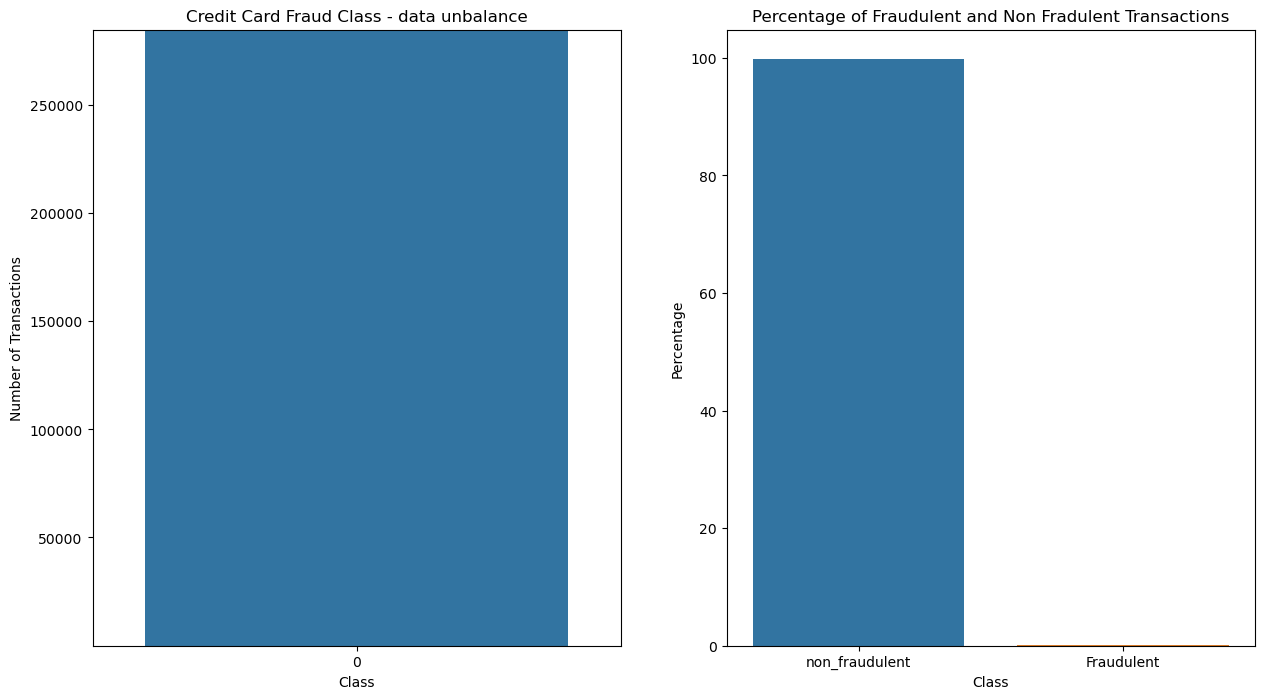

In [22]:
#bar plot for fraudulent and non-fraudulent transactions
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(ccard_fd['Class'])
plt.ylabel("Number of Transactions")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.ylim(1, len(ccard_fd))  # Adjust the y-axis limits to show all values

plt.subplot(1,2,2)
fraud_percenage={"Class": ["non_fraudulent", "Fraudulent"],"Percentage":[99.82725143693798,0.1727485630620034]}
ccard_fd_fraud_percentage=pd.DataFrame(fraud_percenage)
sns.barplot(x='Class',y="Percentage", data=ccard_fd_fraud_percentage)
plt.title("Percentage of Fraudulent and Non Fradulent Transactions")

plt.show()

Comments:<br>

-  The dataset has very high class imbalance. Only 492 records are there among 284807 records which are labeld as fradudulent transaction.

In [23]:
ccard_fd.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

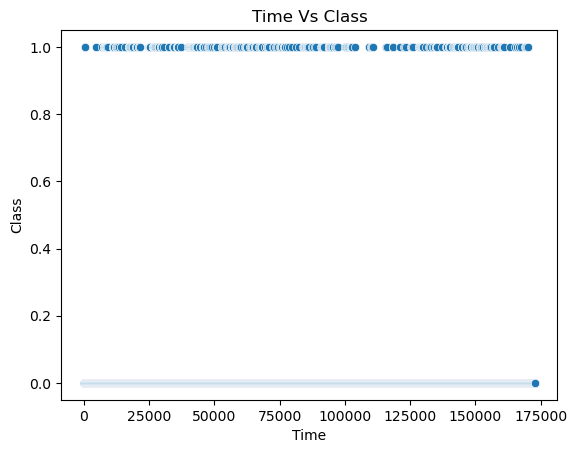

In [24]:
#create a scatter plot to observe the distribution of classes with the time
sns.scatterplot(x=ccard_fd["Time"],y=ccard_fd["Class"])
plt.title("Time Vs Class")
plt.show()

Comments:<br>
    -  We cannot draw insights here based on time. Both the classes distributed over time.

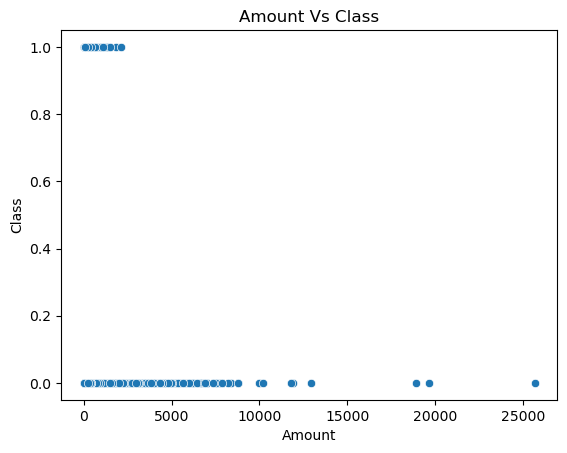

In [25]:
#Distribution of classes with the amount.
sns.scatterplot(x=ccard_fd['Amount'],y=ccard_fd['Class'])
plt.title("Amount Vs Class")
plt.show()

Comments:
    -  Low amount transactions are more fraudulent than higher amounts.

In [26]:
#Time feature is not help us in building the model.
ccard_fd=ccard_fd.drop("Time", axis=1)

In [27]:
ccard_fd.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

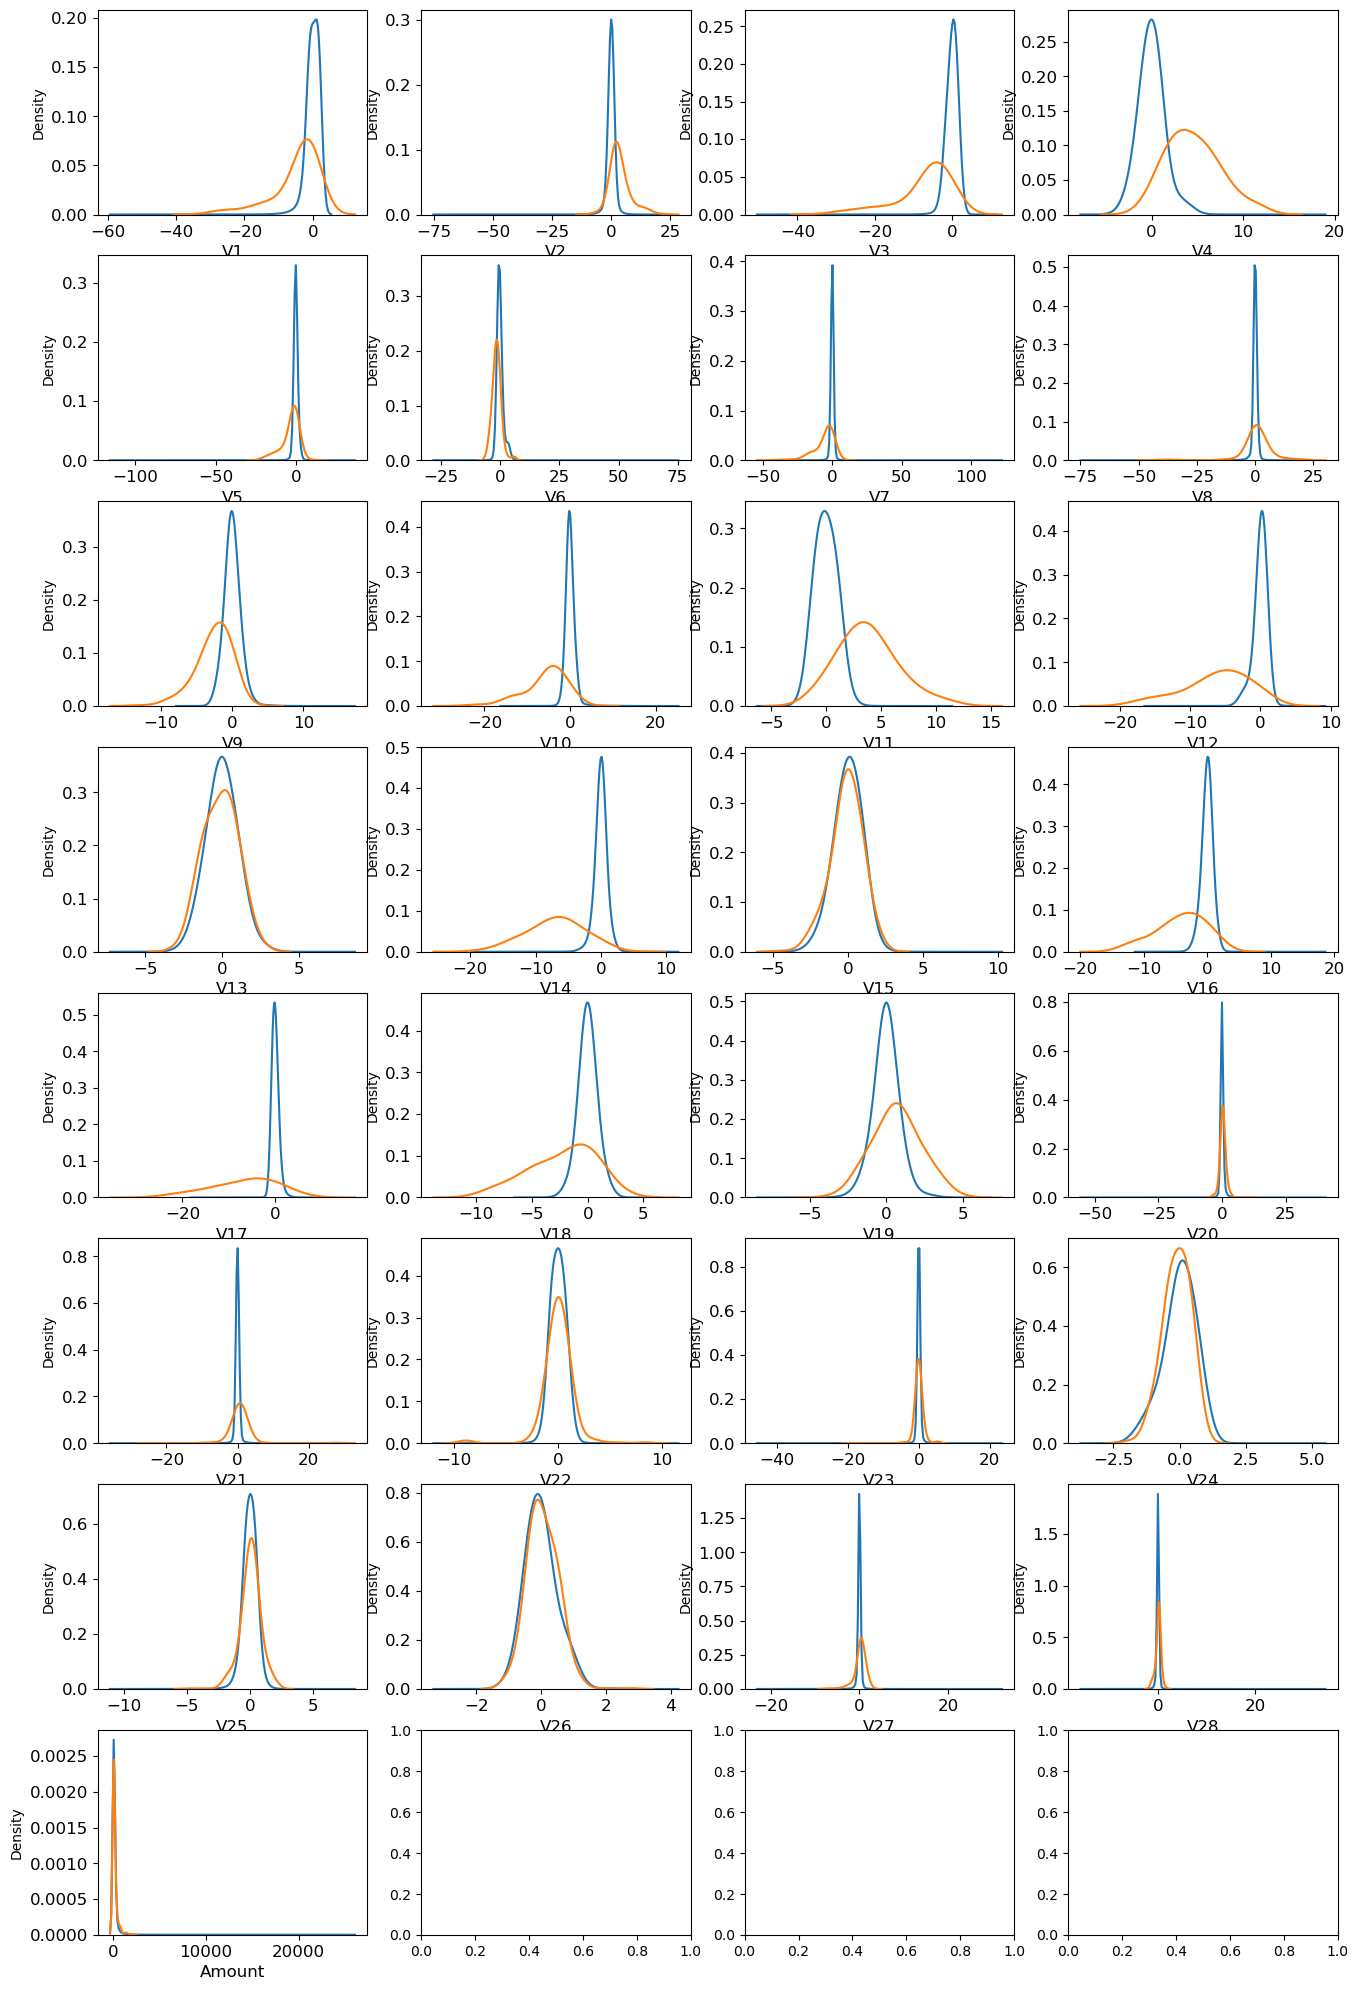

In [28]:
#Plotting the distributions of all the featuers
var= list(ccard_fd.columns.values)
#Dropping the class col from the list

var.remove("Class")

i=0
t0=ccard_fd.loc[ccard_fd['Class']==0]
t1=ccard_fd.loc[ccard_fd['Class']==1]

plt.figure()
fig,ax=plt.subplots(8,4, figsize=(16,25))

for features in var:
    i +=1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[features],bw=0.5,label="0")
    sns.kdeplot(t1[features],bw=0.5,label='1')
    plt.xlabel(features,fontsize=12)
    locs, labels=plt.xticks()
    plt.tick_params(axis="both",which='major',labelsize=12)
    
plt.show()

Comments: <br>
    -  We can see for most of the features are overlapping for both the classes fradulent and non fraudulent.

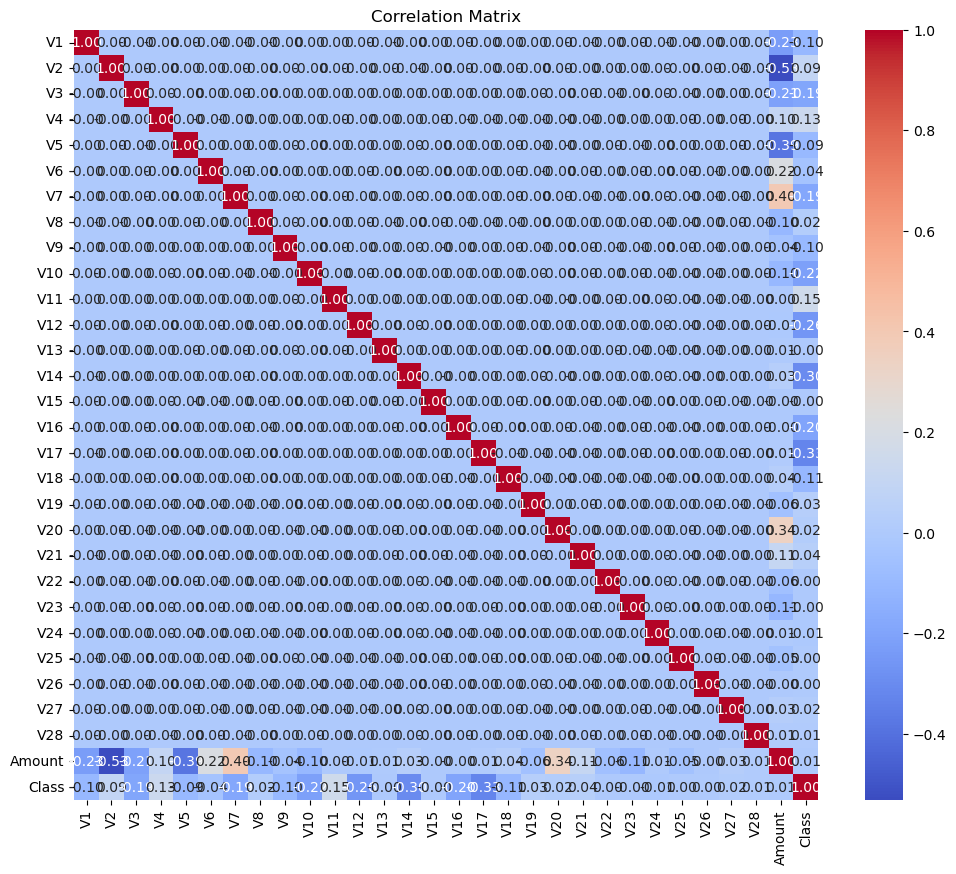

In [29]:
corr_matrix=ccard_fd.corr()

plt.figure(figsize=(12,10))
#generate a heatmap
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Splitting Train and Test Data

In [30]:
y=ccard_fd["Class"]
X=ccard_fd.drop("Class",axis=1)

In [31]:
#Splitting the data into 80:20 respectively
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
#Checking class label
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))


492
394
98


## Feature Scaling using Standard Scaler

In [33]:
#Scaling the amount col
#As PCA is already done, we are going to do scaling only for amount col
scaler=StandardScaler()

#Scaling the train data
X_train[["Amount"]]=scaler.fit_transform(X_train[['Amount']])

#Transforming the test data
X_test[['Amount']]=scaler.transform(X_test[["Amount"]])

In [34]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,0.624996,1.691496,1.255790,-0.253266,-0.331695,0.307252,-0.930844,0.651666,0.167987,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.307889
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,-1.945070,-0.726597,1.060888,-1.193347,0.631053,-0.160123,-1.630444,2.106866,-1.692780,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.167026
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,0.521931,-0.072768,-1.008237,-0.640249,-0.801946,0.678131,0.044374,0.521919,0.198772,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.300043
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,-0.855437,-4.179628,0.286872,1.271254,-1.011647,1.458600,-0.613260,0.814931,-2.147124,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.113600
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,0.472626,1.595929,0.777603,0.187685,-1.060579,0.143332,0.007803,-0.055817,0.712695,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.246029


In [35]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.081514
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.693173
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.225474
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.341192
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.343585


#### Plotting the distribution of a variable to handle skewness

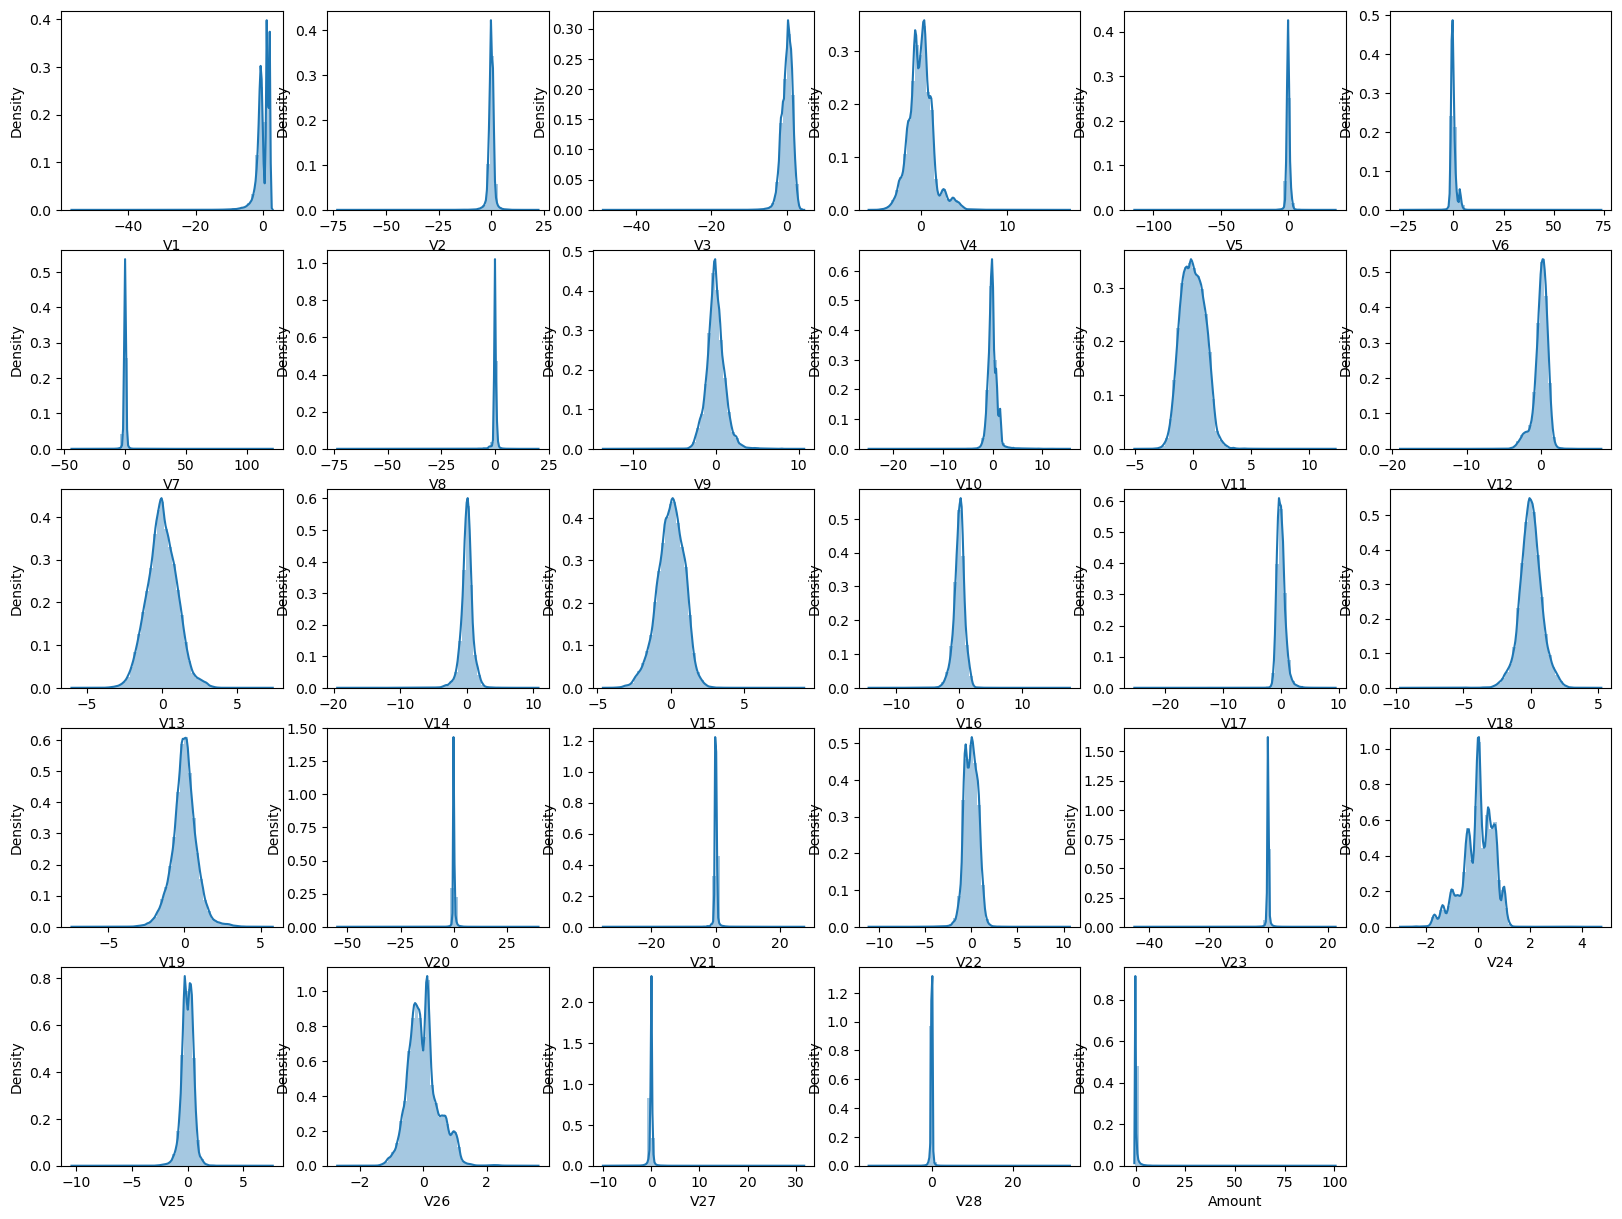

In [36]:
# plot histogram of a variable to see the skewness
var=X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i+=1
    plt.subplot(5,6,i)
    sns.distplot(X_train[col])
    
plt.show()

In [37]:
var=X_train.columns
skew_list=[]
for i in var:
    skew_list.append(X_train[i].skew())
    
tmp=pd.concat([pd.DataFrame(var,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis=1)
tmp.set_index('Features', inplace=True)

tmp.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.320269,-4.826847,-2.219375,0.677776,-2.928646,1.977725,3.74462,-8.445014,0.543603,1.212102,0.359527,-2.281334,0.067612,-1.992812,-0.308053,-1.113875,-3.975821,-0.266115,0.107289,-1.977859,3.656863,-0.230008,-6.285467,-0.552668,-0.417168,0.579265,-0.03833,11.776522,18.352356


In [38]:
#Filtering the features which has skewness less than -1 and greaterthan +1.
skewed=tmp.loc[(tmp["Skewness"]>1)| (tmp["Skewness"]<-1)].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


Comments:<br>
    -  Skweness present in the above resulted features.<br>
    -  Power Transformer package present in the preprocessing library provided by sklearn is used to make the distribution more gaussian.

In [39]:
from sklearn.preprocessing import PowerTransformer
power_t=PowerTransformer(copy=False)
#Fitting the power transformer in train data
X_train[skewed]=power_t.fit_transform(X_train[skewed])

#Transforming the test data
X_test[skewed]=power_t.transform(X_test[skewed])

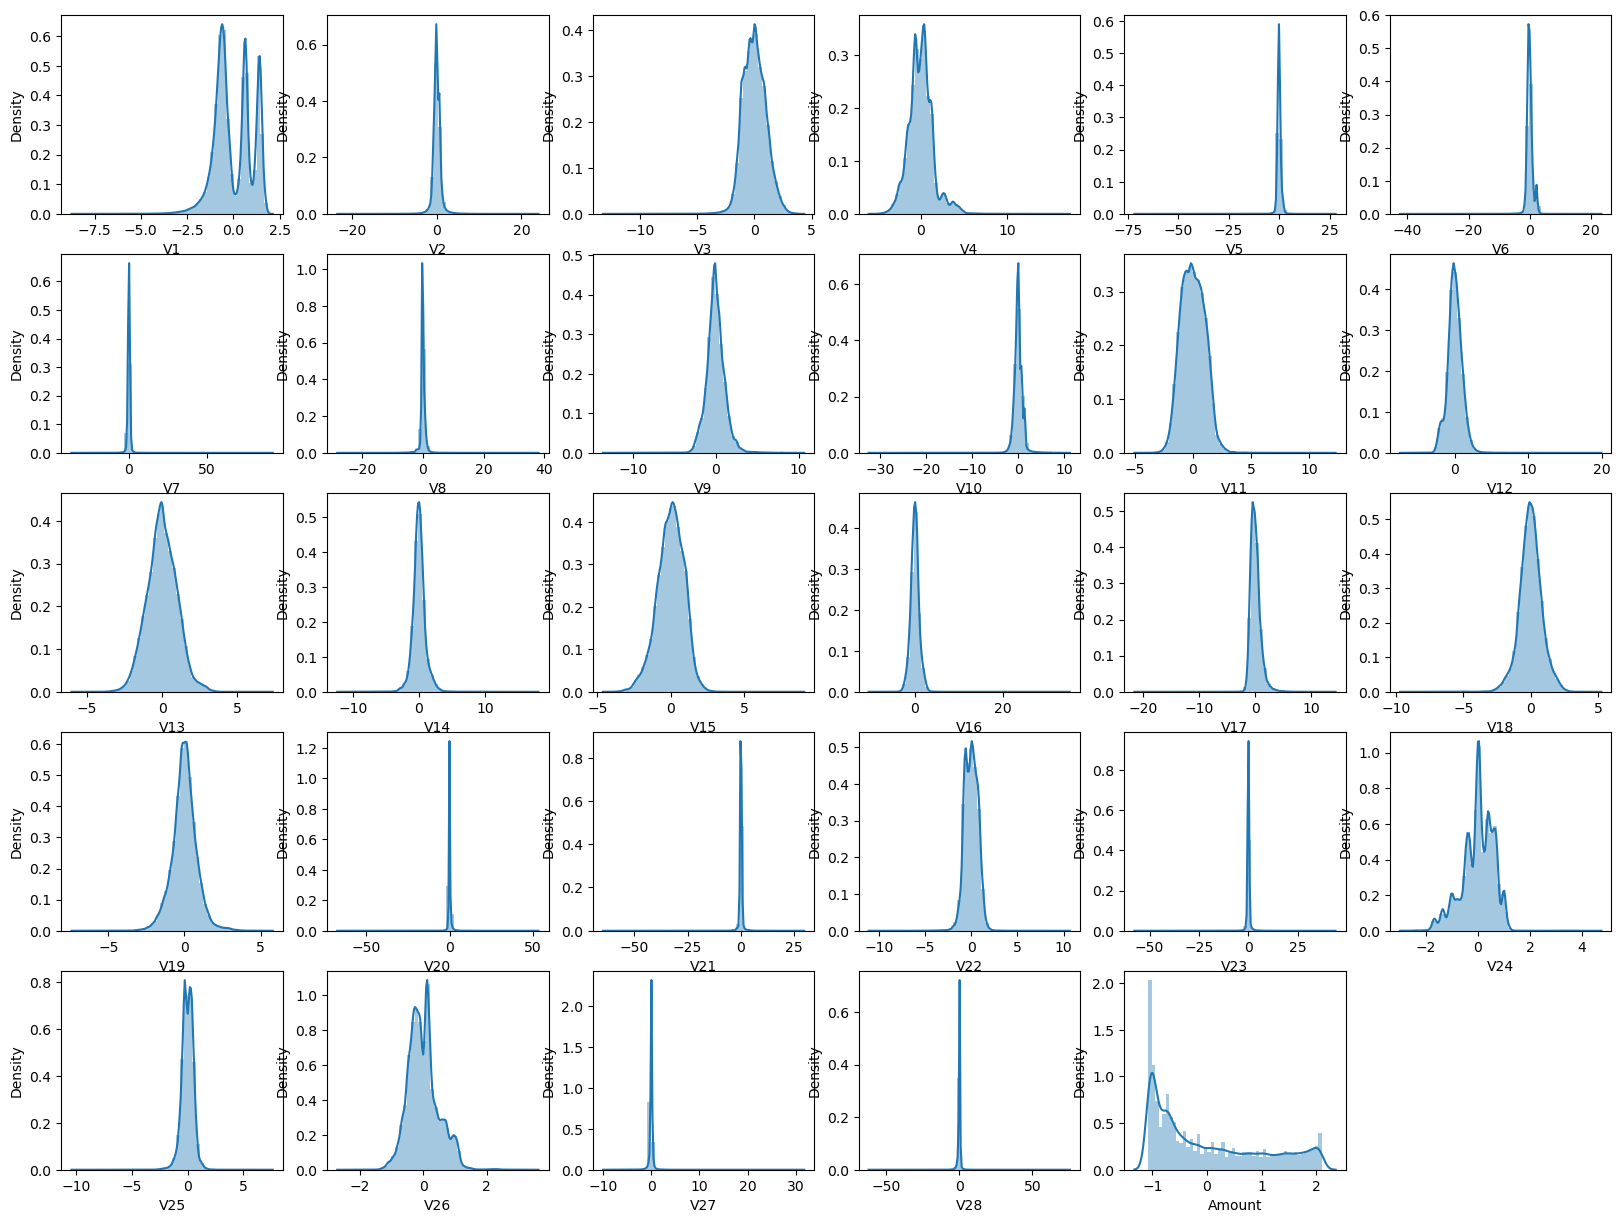

In [40]:
#Plot again to see the results
var=X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i+=1
    plt.subplot(5,6,i)
    sns.distplot(X_train[col])
plt.show()

## Model Building with imbalanced data

In [41]:
# Class imbalance
y_train.value_counts()/y_train.shape

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [42]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9808868419804181
Best hyperparameters:  {'C': 0.01}


In [43]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.621876,0.110217,0.075006,0.026887,0.01,{'C': 0.01},0.968649,0.987418,0.991888,0.972320,0.984158,0.980887,0.008917,1,0.986560,0.981838,0.980641,0.986508,0.981480,0.983405,0.002584
1,2.115632,0.095093,0.046872,0.009884,0.1,{'C': 0.1},0.969796,0.982755,0.988625,0.964694,0.980026,0.977179,0.008725,2,0.983257,0.978596,0.977881,0.985034,0.979206,0.980795,0.002824
2,2.275001,0.090892,0.050004,0.006254,1,{'C': 1},0.970928,0.981696,0.987179,0.962764,0.978303,0.976174,0.008526,3,0.982013,0.977514,0.977196,0.984493,0.978452,0.979934,0.002851
3,2.468751,0.151167,0.046874,0.000005,10,{'C': 10},0.971130,0.981564,0.986990,0.962537,0.978079,0.976060,0.008497,4,0.981847,0.977373,0.977123,0.984424,0.978355,0.979824,0.002854
4,2.387499,0.038776,0.046875,0.000003,100,{'C': 100},0.971157,0.981549,0.986970,0.962509,0.978058,0.976049,0.008495,5,0.981831,0.977356,0.977118,0.984419,0.978347,0.979814,0.002854
5,2.243753,0.165836,0.037495,0.012502,1000,{'C': 1000},0.971160,0.981549,0.986968,0.962506,0.978055,0.976048,0.008495,6,0.981829,0.977357,0.977117,0.984418,0.978345,0.979813,0.002854


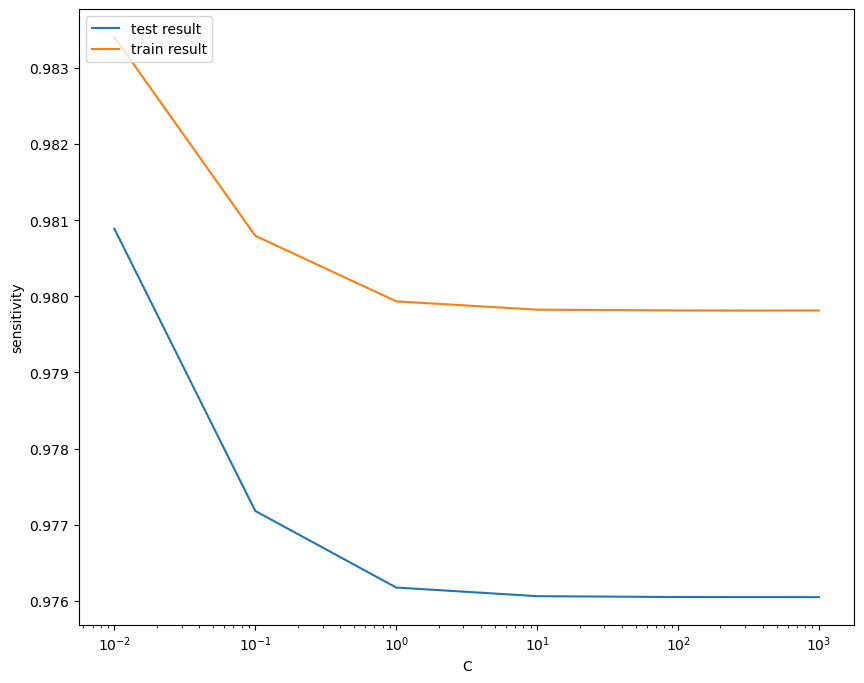

In [44]:
# plot of C versus train and validation scores
plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

In [45]:
# Instantiating the model with best C
log_reg_imb_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

#### Prediction and model evalution on the train set

In [46]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [47]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

In [48]:
display_scores(y_train, y_train_pred)

F1 Score: 73.76%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.62      0.74       394

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [49]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [50]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

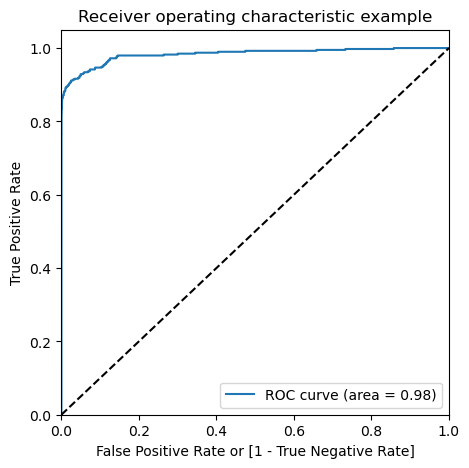

In [51]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

## Evaluating the model on the test set

In [52]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 70.3%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.59      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [53]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

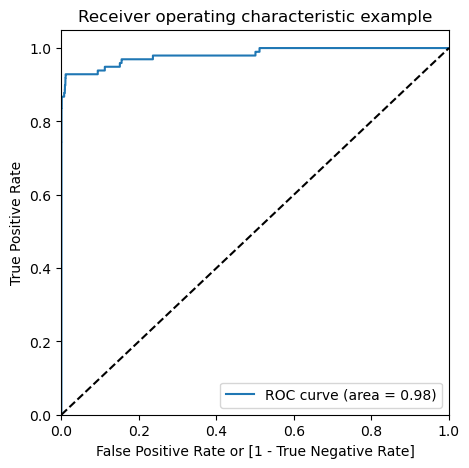

In [54]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

-  We can see very good ROC on the test data set 0.98.<br>

<b>Model Summary:<br></b>

<b>Train set<br></b>

ROC : 98%<br>
F1 Score: 73.76%<br>

<b>Test set<br></b>

ROC : 98%<br>
F1 score: 70.3%<br>

## 2. Descission Tree

In [55]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [56]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,17.043007,0.205052,0.062502,0.000003,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912624,0.919716,0.951700,0.928013,0.016997,6
1,17.828804,0.646541,0.066203,0.005234,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912624,0.919716,0.951703,0.928014,0.016999,5
2,18.087231,0.168942,0.073460,0.007776,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,1
3,17.436284,0.034864,0.062505,0.000008,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,1
4,34.917912,0.159512,0.067713,0.007366,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.934910,0.923838,0.908245,0.922331,0.010938,8
5,33.781660,1.306557,0.067708,0.007364,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.942338,0.923862,0.915751,0.927317,0.011126,7
6,32.791666,0.248807,0.062501,0.000002,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.948468,0.930658,0.915632,0.931586,0.013421,4
7,32.901041,0.456846,0.046889,0.012748,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.948459,0.930702,0.915628,0.931596,0.013418,3


In [57]:
#optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9338362614319525
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


#### Decision Tree with optimal hyperparameters

In [58]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

#### Prediction on the train set

In [59]:
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 72.33%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.77      0.68      0.72       394

    accuracy                           1.00    227845
   macro avg       0.89      0.84      0.86    227845
weighted avg       1.00      1.00      1.00    227845



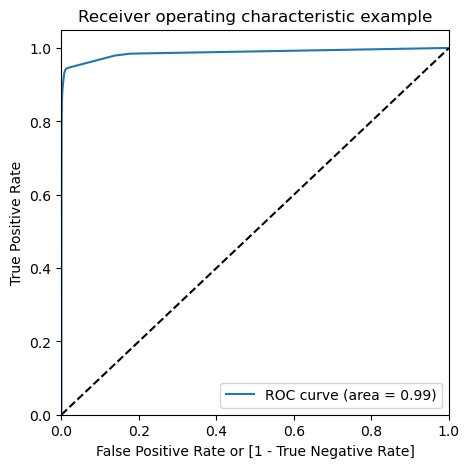

In [60]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Evaluating the model on the test set

In [61]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 71.88%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.70      0.72        98

    accuracy                           1.00     56962
   macro avg       0.87      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



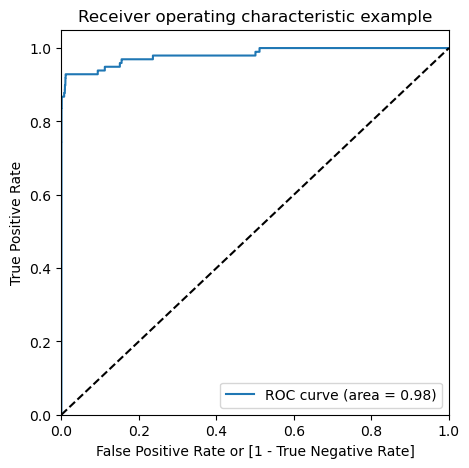

In [62]:
# Predicted probability
y_test_pred_prob = dt_imb_model.predict_proba(X_test)[:,1]

# Plotting the ROC curve
draw_roc(y_test, y_test_pred_proba)

<b>Model Summary</b><br>

</b>Train set</b><br>

ROC Score: 99%<br>
F1 score : 72.33%<br><br>

</b>Test set</b><br>

ROC Score: 96%<br>
F1 score : 71.88%

## 3. XGBoost

In [63]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [64]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.859691,0.222877,0.166667,0.014736,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.968831,0.960607,0.986866,0.972101,0.010967,6,0.999832,0.999843,0.999686,0.999787,0.000071
1,4.750005,0.033750,0.156246,0.000006,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.975385,0.983747,0.987352,0.982161,0.005013,2,0.999883,0.999946,0.999879,0.999902,0.000031
2,4.624999,0.012756,0.156254,0.000004,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.980065,0.976040,0.988241,0.981449,0.005076,3,0.999931,0.999922,0.999836,0.999896,0.000042
3,4.883811,0.036832,0.151038,0.007367,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.974193,0.962130,0.983242,0.973189,0.008648,5,0.999997,0.999979,0.999995,0.999990,0.000008
4,4.916664,0.019485,0.156249,0.000006,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.978817,0.965375,0.980272,0.974821,0.006706,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,4.776049,0.019488,0.171869,0.000002,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.984408,0.978815,0.985159,0.982794,0.002830,1,1.000000,1.000000,1.000000,1.000000,0.000000


In [65]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.982793816632015
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [66]:
# Printing best parameters
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

## XGBoost model with optimal hyperparameter

In [67]:
# Printing best parameters
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

#### Model evaluation on train set

In [68]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

display_scores(y_train, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



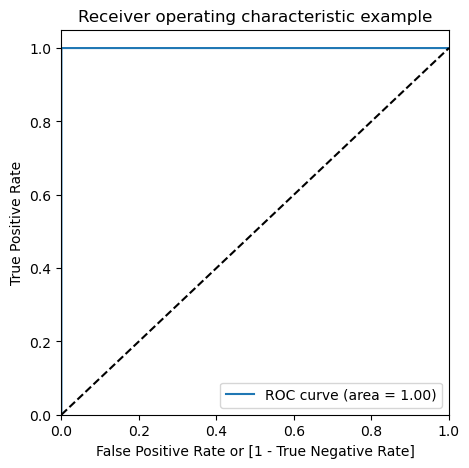

In [69]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

#### Evaluating the model on the test set

In [70]:
# Prediction on the test set
y_test_pred = xgb_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 87.64%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



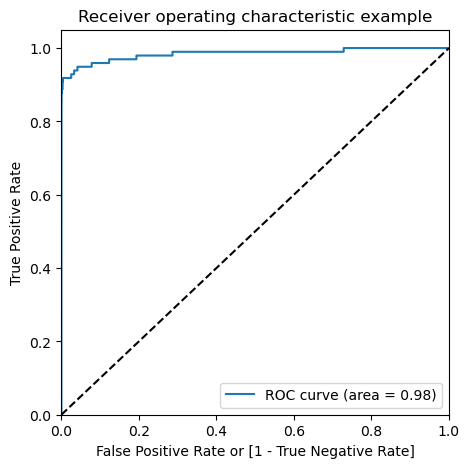

In [71]:
# Predicted probability
y_test_pred_prob = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_prob)

<b>Model Summary</b>

<b>Train set</b>
-  ROC score: 100%</b>
-  F1 score: 100.0%</b>

<b>Test set</b>
-  <b>ROC score: 98%</b>
-  <b>F1 score: 88.27%</b>

-  XGBoost model performs well on unbalanced data out of above three models. With train data, the ROC-AUC score is 100%, while with test data, it is 98%.

<b>Important features of the best model: </b>
-  This will not give much explanation on the already transformed dataset<br>
-  mBut it will help us in understanding if the dataset is not PCA transformed<br>

Top var = 14
2nd Top var = 7
3rd Top var = 10


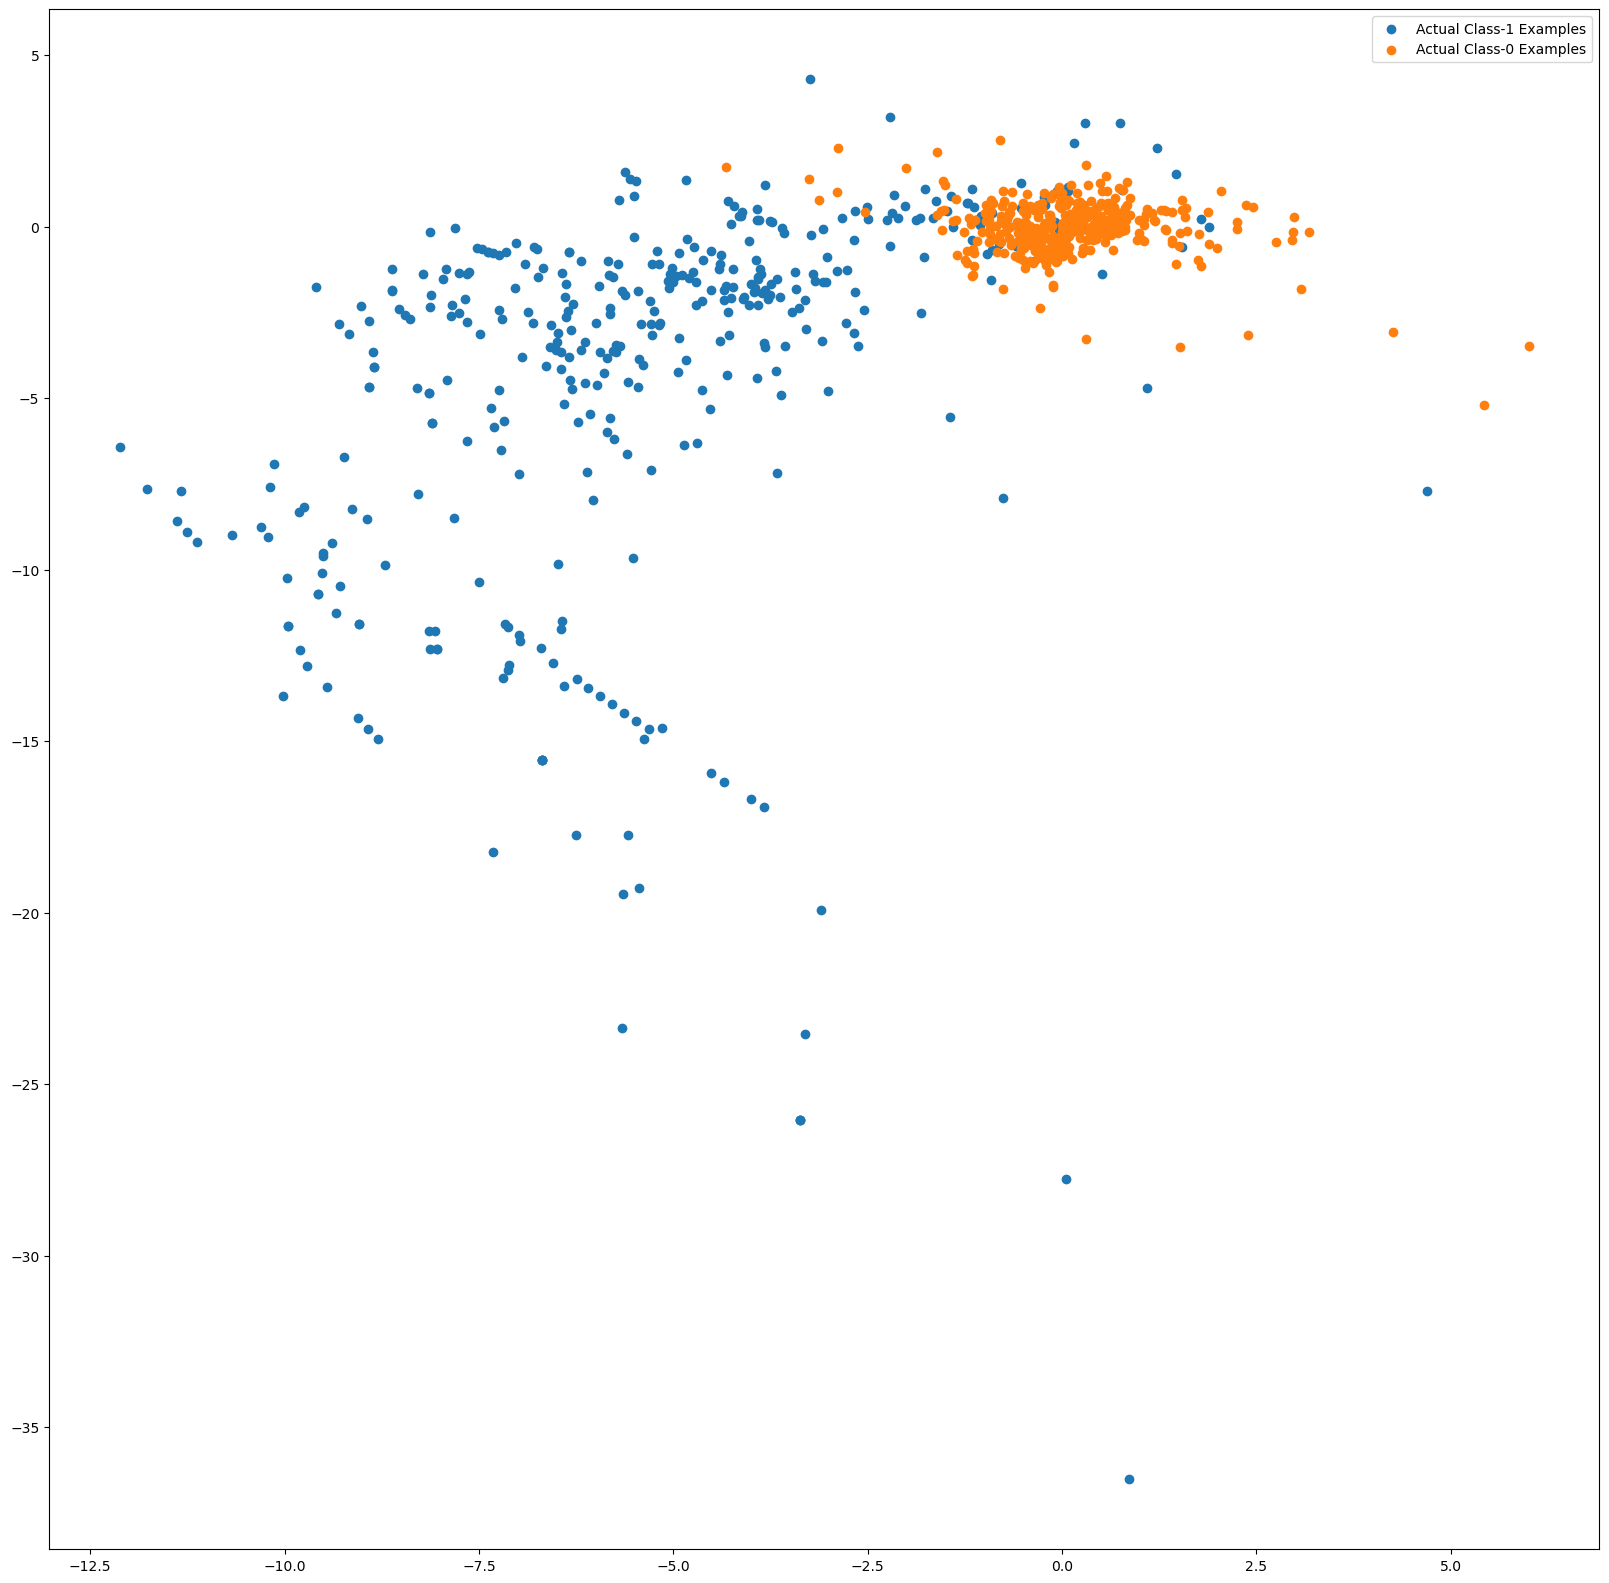

In [72]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [73]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.81609064


## Model building with balancing Classes

#### i. Random Oversampling

In [74]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [75]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227451})


#### ii. Logistic Regrassion with Random Oversampling

In [76]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9871239501377526
Best hyperparameters:  {'C': 100}


In [77]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.028675,0.133714,0.057394,0.006507,0.01,{'C': 0.01},0.986918,0.986671,0.987192,0.986835,0.987273,0.986978,0.000224,6,0.987044,0.987045,0.986882,0.986998,0.986967,0.986987,0.000060
1,1.953284,0.055527,0.053931,0.008742,0.1,{'C': 0.1},0.987049,0.986798,0.987319,0.986967,0.987413,0.987109,0.000227,5,0.987175,0.987180,0.987013,0.987130,0.987102,0.987120,0.000061
2,2.028129,0.163399,0.056249,0.012499,1,{'C': 1},0.987065,0.986810,0.987331,0.986979,0.987426,0.987122,0.000227,4,0.987188,0.987194,0.987025,0.987143,0.987115,0.987133,0.000061
3,2.078132,0.060116,0.050003,0.011702,10,{'C': 10},0.987066,0.986811,0.987332,0.986980,0.987428,0.987123,0.000227,3,0.987189,0.987196,0.987026,0.987144,0.987116,0.987134,0.000062
4,1.971892,0.104773,0.046863,0.000009,100,{'C': 100},0.987068,0.986811,0.987332,0.986981,0.987428,0.987124,0.000227,1,0.987189,0.987196,0.987026,0.987144,0.987116,0.987134,0.000062
5,2.098574,0.117550,0.059375,0.006250,1000,{'C': 1000},0.987067,0.986811,0.987332,0.986981,0.987428,0.987124,0.000227,2,0.987189,0.987196,0.987026,0.987144,0.987116,0.987134,0.000062


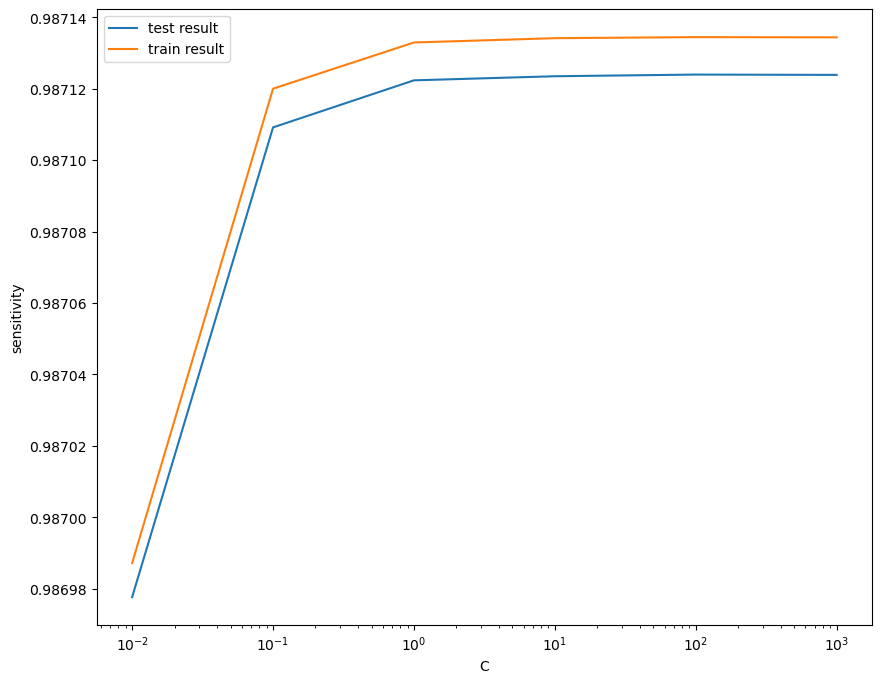

In [78]:
# plot of C versus train and validation scores
plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

## Logistic Regression with hyperparameter tuning

In [79]:
model_cv.best_params_

{'C': 100}

In [80]:
# Instantiating the model
logreg_over = LogisticRegression(C=1000)

logreg_over_model = logreg_over.fit(X_over, y_over)

In [81]:
y_train_pred = logreg_over_model.predict(X_over)

In [82]:
display_scores(y_over, y_train_pred)

F1 Score: 94.36%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



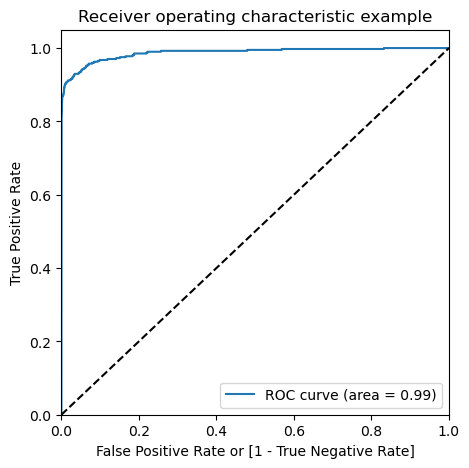

In [83]:

# Predicted probability
y_train_pred_proba = logreg_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Evaluating on test data

In [84]:
# Evaluating on test data
y_test_pred = logreg_over_model.predict(X_test)

# Printing the scores
display_scores(y_test, y_test_pred)

F1 Score: 10.52%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



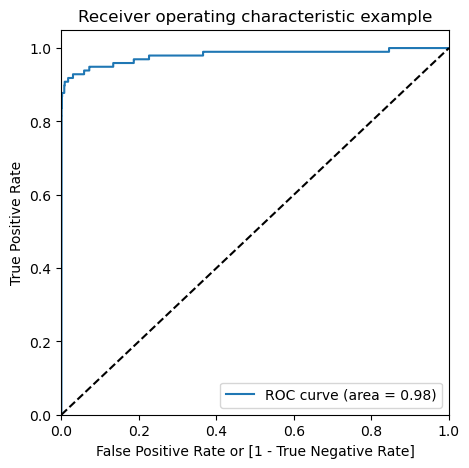

In [86]:
# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<b>Model Summary</b><br>

<b>Train set</b><br>
-  ROC score : 99%<br>
-  F1 score: 94.34%<br>

<b>Test set</b><br>
-  ROC score : 98%<br>
-  F1 score: 10.54%

## 2. Decision Tree with Random Oversampling

In [87]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over,y_over)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [88]:
#Optimal ROC score and tuning
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9988751854502653
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


#### Decision Tree with optimal hyperparameters

In [90]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

In [91]:
#Evaluaing the model
y_train_pred = dt_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 99.43%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    227451
           1       0.99      1.00      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



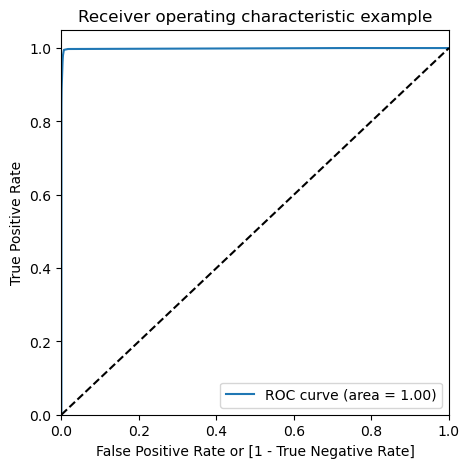

In [92]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Predictions on the test set

In [93]:
# Evaluating model on the test data
y_test_pred = dt_over_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 28.67%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.17      0.82      0.29        98

    accuracy                           0.99     56962
   macro avg       0.59      0.90      0.64     56962
weighted avg       1.00      0.99      1.00     56962



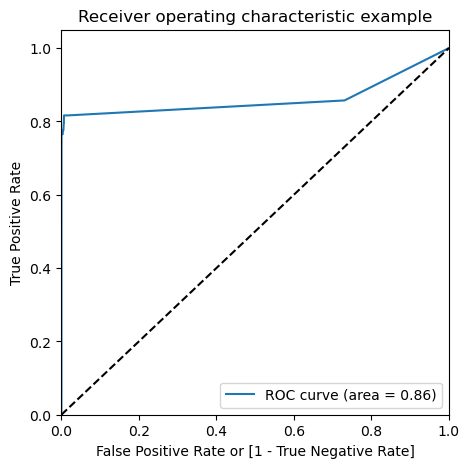

In [94]:
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model Summary<br><br>

Train set<br>
-  ROC score : 100%<br><br>
-  F1 score: 99.43%<br>
    
Test set<br>
-  ROC score : 86%<br>
-  F1 score: 28.67%

## 3. XGBoost with Random Oversampling

In [95]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_over, y_over) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [100]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,9.048846,0.454925,0.296874,0.000008,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999857,0.999850,0.999866,0.999858,0.000007,4,0.999868,0.999867,0.999892,0.999876,1.125413e-05
1,10.289388,0.393676,0.302083,0.007369,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999853,0.999860,0.999849,0.999854,0.000004,5,0.999858,0.999875,0.999867,0.999867,6.765763e-06
2,10.310582,0.059356,0.311231,0.005061,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999848,0.999860,0.999845,0.999851,0.000007,6,0.999857,0.999876,0.999865,0.999866,7.823617e-06
3,10.109707,0.178287,0.317014,0.018557,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999968,0.999992,0.999981,0.999980,0.000010,1,0.999995,0.999989,0.999998,0.999994,3.681745e-06
4,9.462648,0.042548,0.315479,0.012569,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999977,0.999976,0.999981,0.999978,0.000002,3,0.999991,0.999992,0.999995,0.999993,1.926446e-06
5,9.934871,0.424611,0.308009,0.012733,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999981,0.999981,0.999972,0.999978,0.000004,2,0.999994,0.999995,0.999994,0.999994,6.879312e-07


In [101]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999801377267152
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [102]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.3}

#### XGBoost with optimal hyperparameter

In [103]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_over_model = XGBClassifier(params = params)
xgb_over_model.fit(X_over, y_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

In [104]:
# Predictions on the train set
y_train_pred = xgb_over_model.predict(X_over)

display_scores(y_over, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



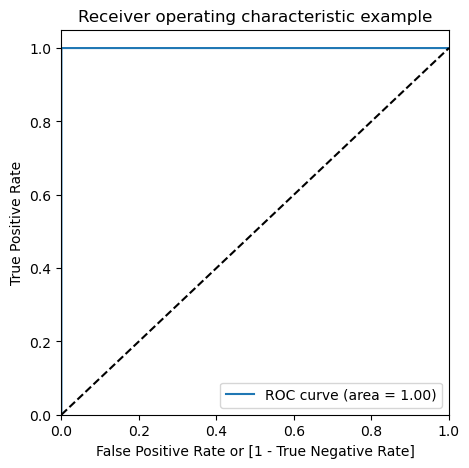

In [105]:
# Predicted probability
y_train_pred_proba = xgb_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Predictions on the test set

In [106]:
y_pred = xgb_over_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 90.22%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.85      0.90        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



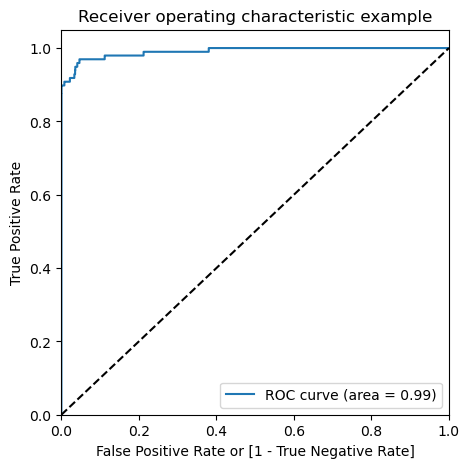

In [107]:
# Predicted probability
y_test_pred_proba = xgb_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model Summary<br>
Train set<br>
ROC score : 100%<br>
F1 score: 100%<br>
Test set<br><br>
ROC score : 99%<br>
F1 score: 90%<br>m

# SMOTE (Synthetic Minority Oversampling Technique)


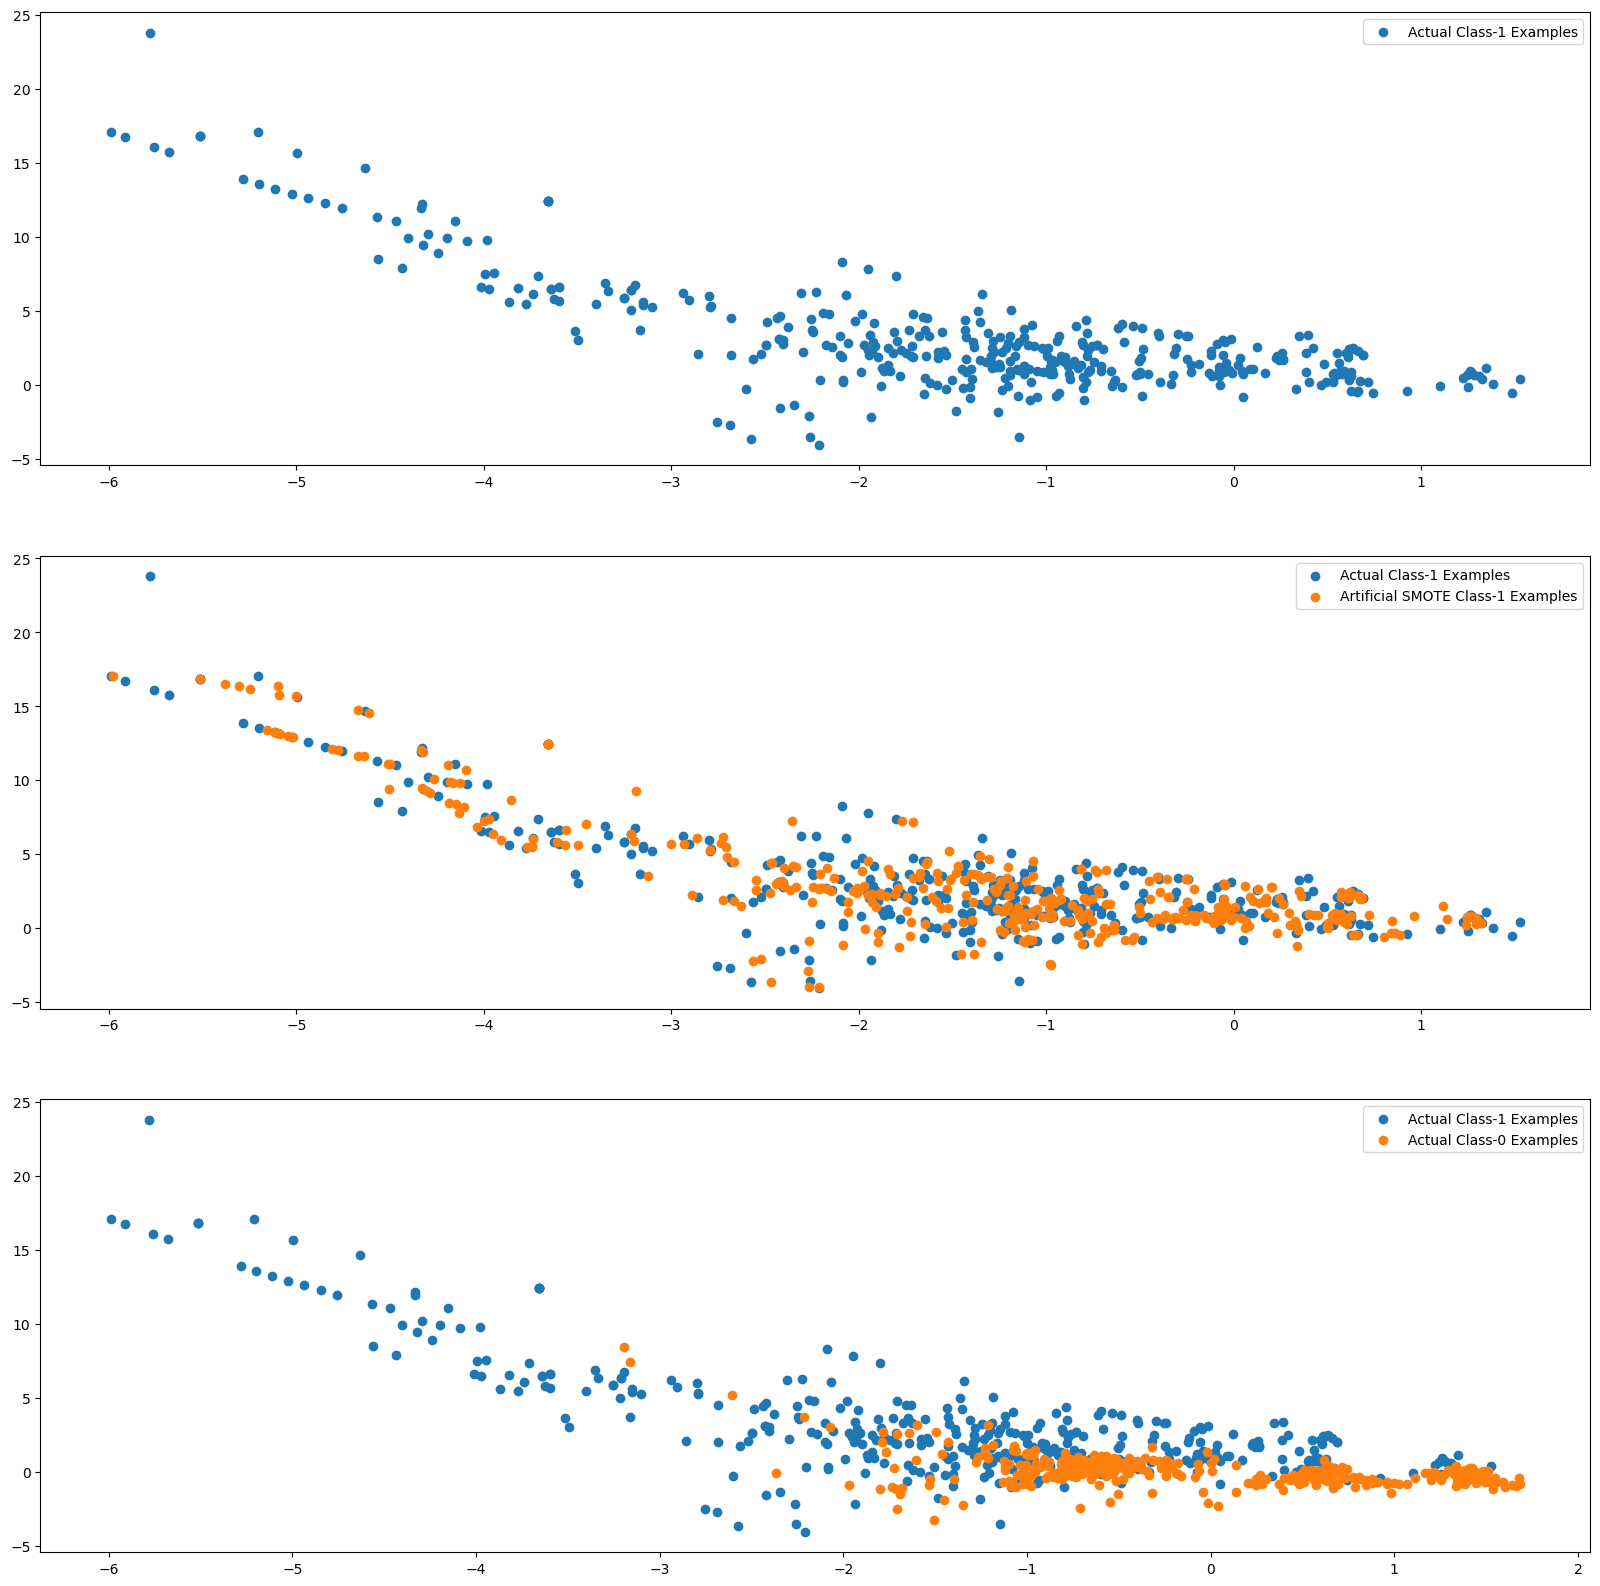

In [108]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively

X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#### 1. Logistic Regression on balanced data with SMOTE

In [109]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)


#print the evaluation result by choosing a evaluation metric
print('Best ROC_AUC score: ', model_cv.best_score_)
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC_AUC score:  0.9889852507920895
Best hyperparameters:  {'C': 100}


In [110]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.306142,0.347133,0.057516,0.008783,0.01,{'C': 0.01},0.988651,0.989120,0.989007,0.988704,0.988881,0.988873,0.000177,6,0.988979,0.988788,0.988797,0.988914,0.988955,0.988887,0.00008
1,2.327297,0.254767,0.055063,0.008770,0.1,{'C': 0.1},0.988757,0.989219,0.989093,0.988807,0.988993,0.988974,0.000173,5,0.989079,0.988894,0.988893,0.989012,0.989060,0.988987,0.00008
2,2.327741,0.110122,0.061799,0.009991,1,{'C': 1},0.988768,0.989229,0.989101,0.988817,0.989005,0.988984,0.000172,4,0.989089,0.988905,0.988903,0.989022,0.989071,0.988998,0.00008
3,2.195871,0.059360,0.057681,0.006320,10,{'C': 10},0.988769,0.989230,0.989102,0.988818,0.989006,0.988985,0.000172,3,0.989090,0.988906,0.988905,0.989023,0.989072,0.988999,0.00008
4,2.194902,0.086918,0.060452,0.005086,100,{'C': 100},0.988769,0.989230,0.989102,0.988818,0.989006,0.988985,0.000172,1,0.989090,0.988906,0.988905,0.989023,0.989072,0.988999,0.00008
5,2.219035,0.143612,0.054438,0.015573,1000,{'C': 1000},0.988769,0.989230,0.989102,0.988818,0.989006,0.988985,0.000172,2,0.989090,0.988906,0.988905,0.989023,0.989072,0.988999,0.00008


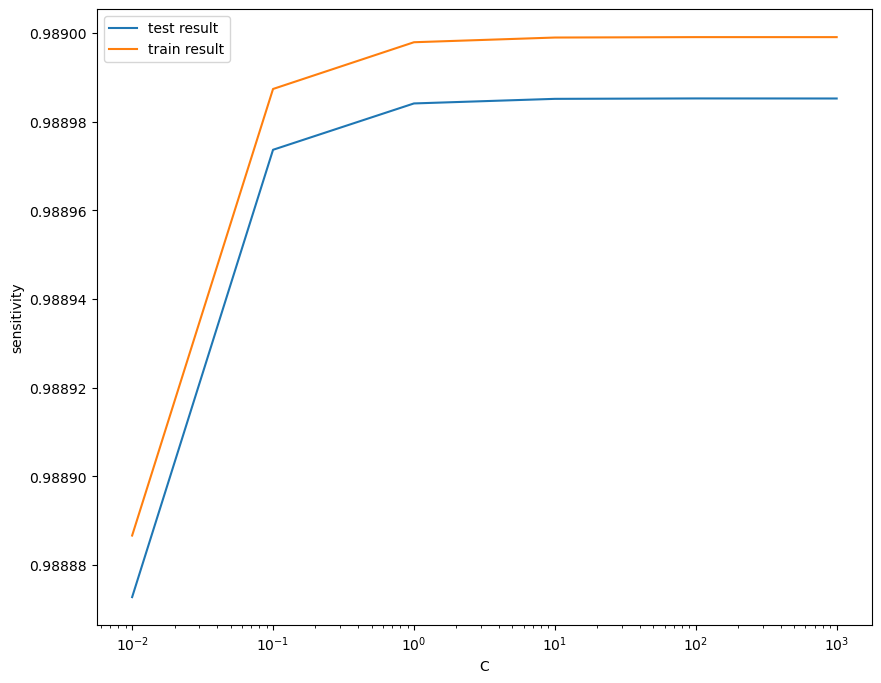

In [111]:
# plotting of the C Vs train and validation scores

plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

## Logistic Regression with optimal C

In [112]:
#best params
model_cv.best_params_

{'C': 100}

In [113]:

# Instantiating the model
logreg_smote_model = LogisticRegression(C=100)

# Fit the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=100)

#### Evaluating the model on train data

In [114]:
# Evaluating on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 94.23%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



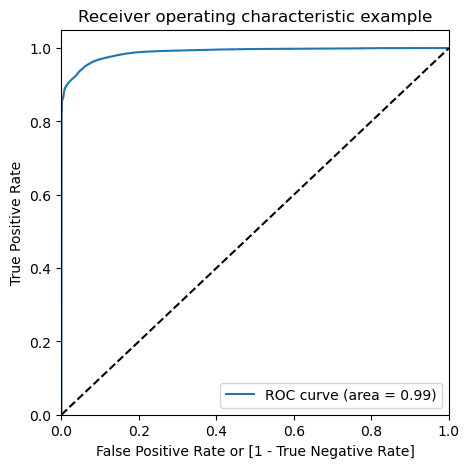

In [115]:
#Probability prediction
y_train_pred_proba_smote = logreg_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_smote)

In [116]:

# Evaluating on test data
y_test_pred = logreg_smote_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 9.79%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



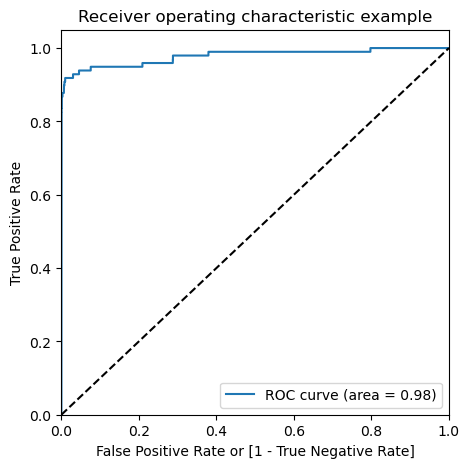

In [117]:
# Predicted probability
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote)

Model Summary<br>

Train set<br>
ROC score : 99%<br>
F1 score: 94.23%<br>
    
Test set<br>
ROC score : 98%<br>
F1 score: 9.79%

## 2. Decision Tree on balanced data with SMOTE

In [120]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),  # Range of maximum depth values to be tried
    'min_samples_leaf': range(50, 150, 50),  # Range of minimum samples per leaf to be tried
    'min_samples_split': range(50, 150, 50),  # Range of minimum samples required to split an internal node to be tried
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()  # Creating a DecisionTreeClassifier instance

# Setting up the grid search with defined parameters
grid_search = GridSearchCV(estimator=dtree,  # Using DecisionTreeClassifier as estimator
                           param_grid=param_grid,  # Using the defined parameter grid
                           scoring='roc_auc',  # Scoring metric for evaluation
                           cv=3,  # Number of cross-validation folds
                           n_jobs=-1,  # Number of jobs to run in parallel (-1 for using all available cores)
                           verbose=1)  # Verbosity level: 0 (silent), 1 (progress bar), 2 (one line per fit)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)  # Fitting the grid search to the training data


Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [121]:
# Printing the best ROC AUC score
print("Best ROC AUC score:", grid_search.best_score_)

# Printing the best estimator
print("Best Estimator:")
print(grid_search.best_estimator_)

Best ROC AUC score: 0.9976078614179705
Best Estimator:
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [122]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}

In [123]:
# Instantiate a DecisionTreeClassifier with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion="gini",  # Split criterion
                                        random_state=100,  # Random state for reproducibility
                                        max_depth=10,  # Maximum depth of the tree
                                        min_samples_leaf=50,  # Minimum number of samples required to be at a leaf node
                                        min_samples_split=50)  # Minimum number of samples required to split an internal node

# Fit the model to the training data
dt_smote_model.fit(X_train_smote, y_train_smote)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

#### Evaluating the model on train data

In [124]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 98.61%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



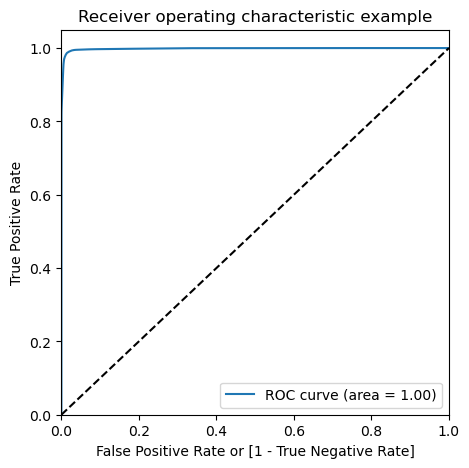

In [125]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [126]:
# Evaluating model on the test data
y_pred = dt_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 15.62%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.85      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.57     56962
weighted avg       1.00      0.98      0.99     56962



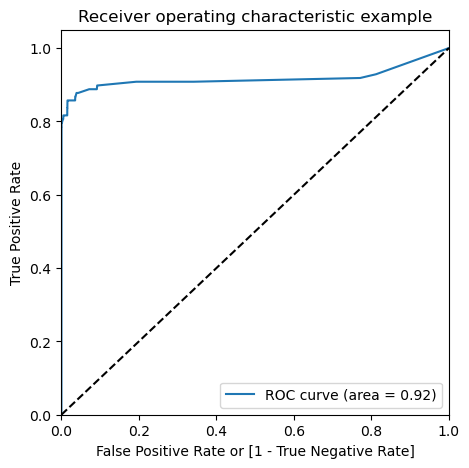

In [127]:
# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)

Model Summary<br>

Train set<br>
ROC score : 100%<br>
F1 score: 98.61%<br>
    
Test set<br>
ROC score : 92%<br>
F1 score: 15.62%<br>

## 3. XGBoost on balanced data with SMOTE

In [128]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the number of folds for cross-validation
folds = 3

# Define the range of hyperparameters to be tuned
param_grid = {
    'learning_rate': [0.2, 0.6],  # Learning rates to be tried
    'subsample': [0.3, 0.6, 0.9]  # Subsample ratios to be tried
}

# Specify the model to be used (XGBoost Classifier) with initial hyperparameters
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)  # XGBoost classifier with specified max depth and number of estimators

# Set up GridSearchCV to perform hyperparameter tuning
model_cv = GridSearchCV(estimator=xgb_model,  # XGBoost classifier as estimator
                        param_grid=param_grid,  # Hyperparameter grid to search over
                        scoring='roc_auc',  # Scoring metric for evaluation
                        cv=folds,  # Number of cross-validation folds
                        verbose=1,  # Verbosity level: 0 (silent), 1 (progress bar), 2 (one line per fit)
                        return_train_score=True)  # Whether to return training scores

# Fit the model to the training data
model_cv.fit(X_train_smote, y_train_smote)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [129]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,9.286822,0.391336,0.308608,0.008448,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999511,0.999556,0.999494,0.999520,0.000026,5,0.999570,0.999553,0.999534,0.999552,0.000015
1,8.959536,0.130770,0.333331,0.032106,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999512,0.999544,0.999543,0.999533,0.000015,4,0.999577,0.999548,0.999580,0.999569,0.000014
2,9.057287,0.364056,0.328128,0.033754,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999495,0.999567,0.999483,0.999515,0.000037,6,0.999561,0.999567,0.999531,0.999553,0.000016
3,8.984374,0.025520,0.307288,0.007361,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999907,0.999922,0.999942,0.999924,0.000014,3,0.999962,0.999955,0.999968,0.999962,0.000005
4,9.395834,0.313622,0.302084,0.007363,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999923,0.999930,0.999940,0.999931,0.000007,1,0.999966,0.999959,0.999963,0.999963,0.000003
5,8.907777,0.040165,0.302084,0.019487,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999923,0.999929,0.999936,0.999929,0.000005,2,0.999955,0.999961,0.999963,0.999960,0.000004


In [130]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999310003781012
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [131]:

model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [132]:
# Import XGBoost classifier
from xgboost import XGBClassifier

# Chosen hyperparameters
params = {
    'learning_rate': 0.6,  # Learning rate controls the step size during optimization
    'max_depth': 2,  # Maximum depth of each tree in the ensemble
    'n_estimators': 200,  # Number of trees in the ensemble
    'subsample': 0.6,  # Subsample ratio of the training instances (proportion of samples used to fit each tree)
    'objective': 'binary:logistic'  # Objective function for binary classification, outputs probability rather than label
}

# Instantiate XGBoost classifier with the chosen hyperparameters
xgb_smote_model = XGBClassifier(**params)  # Creating an XGBoost classifier instance with the specified hyperparameters

# Fit the model on training data
xgb_smote_model.fit(X_train_smote, y_train_smote)  # Fitting the XGBoost classifier to the training data


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Model Evaluation

In [133]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 99.87%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



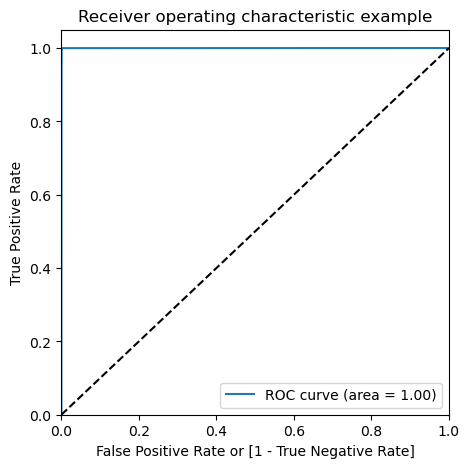

In [134]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [135]:
y_pred = xgb_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 51.83%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.37      0.87      0.52        98

    accuracy                           1.00     56962
   macro avg       0.68      0.93      0.76     56962
weighted avg       1.00      1.00      1.00     56962



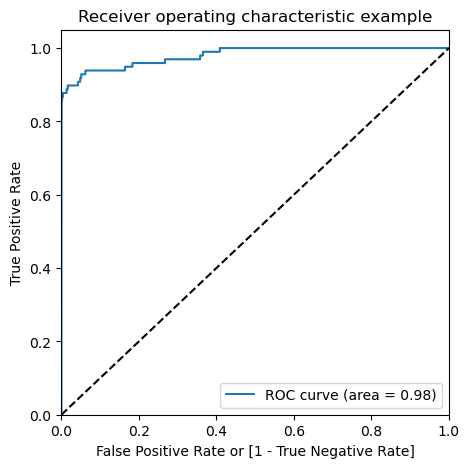

In [136]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model Summary<br>

Train set<br>
ROC score : 100.0%<br>
F1 score: 99.87%<br>
    
Test set<br>
ROC score : 98%<br>
F1 score: 51.95%

## ADASYN (Adaptive Synthetic Sampling)

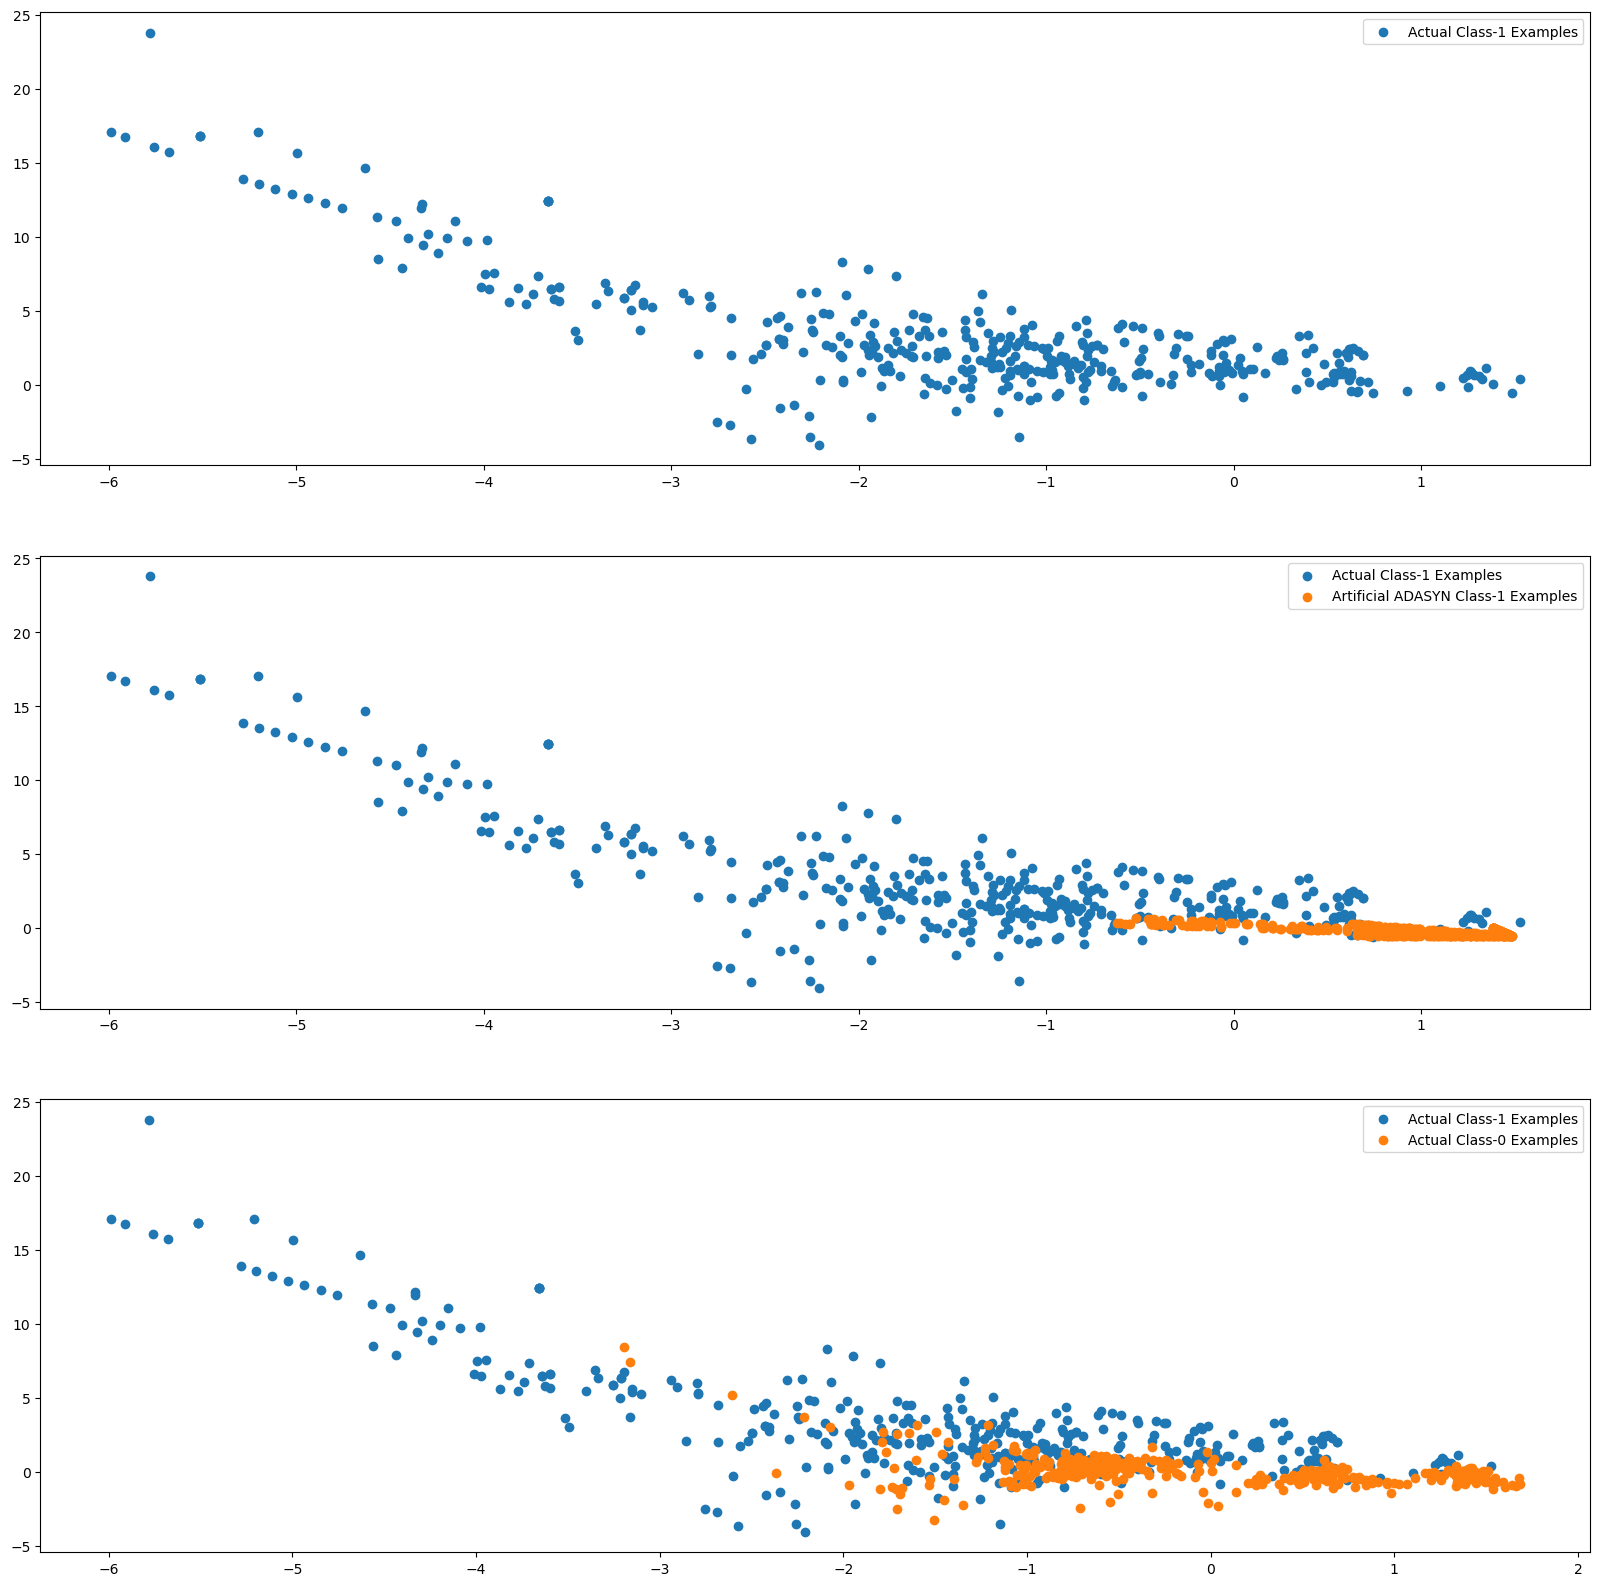

In [137]:
# Import necessary libraries
from imblearn import over_sampling  # Import oversampling module from imbalanced-learn
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Instantiate the ADASYN oversampler
ada = over_sampling.ADASYN(random_state=0)

# Resample the training data using ADASYN
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

# Extract only the artificial minority samples from ADASYN
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

# Extract minority class (label 1) and majority class (label 0) samples from original training data
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

# Set up matplotlib for plotting
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

# Plotting actual class 1 examples
plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

# Plotting actual class 1 examples and artificial ADASYN class 1 examples
plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

# Plotting actual class 1 examples and actual class 0 examples
plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# Show the plot
plt.show()


## 1. Logistic Regression on balanced data with ADASYN

In [138]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best ROC AUC score:  0.9616425505885863
Best hyperparameters:  {'C': 1000}


In [139]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.948191,0.098232,0.098944,0.014721,0.01,{'C': 0.01},0.961204,0.961287,0.961636,0.961376,0.000187,6,0.961514,0.961242,0.961433,0.961396,0.000114
1,1.906532,0.155663,0.098955,0.007359,0.1,{'C': 0.1},0.961447,0.961530,0.961883,0.961620,0.000189,5,0.961765,0.961481,0.961674,0.961640,0.000119
2,1.807304,0.146755,0.098958,0.007362,1,{'C': 1},0.961468,0.961550,0.961903,0.961640,0.000188,4,0.961787,0.961501,0.961694,0.961661,0.000119
3,1.854171,0.096617,0.088536,0.007374,10,{'C': 10},0.961470,0.961552,0.961904,0.961642,0.000188,3,0.961789,0.961503,0.961695,0.961662,0.000119
4,1.833351,0.103108,0.104157,0.007362,100,{'C': 100},0.961471,0.961552,0.961904,0.961642,0.000188,2,0.961789,0.961504,0.961696,0.961663,0.000119
5,1.848956,0.114354,0.109381,0.012768,1000,{'C': 1000},0.961471,0.961552,0.961905,0.961643,0.000188,1,0.961789,0.961503,0.961696,0.961663,0.000119


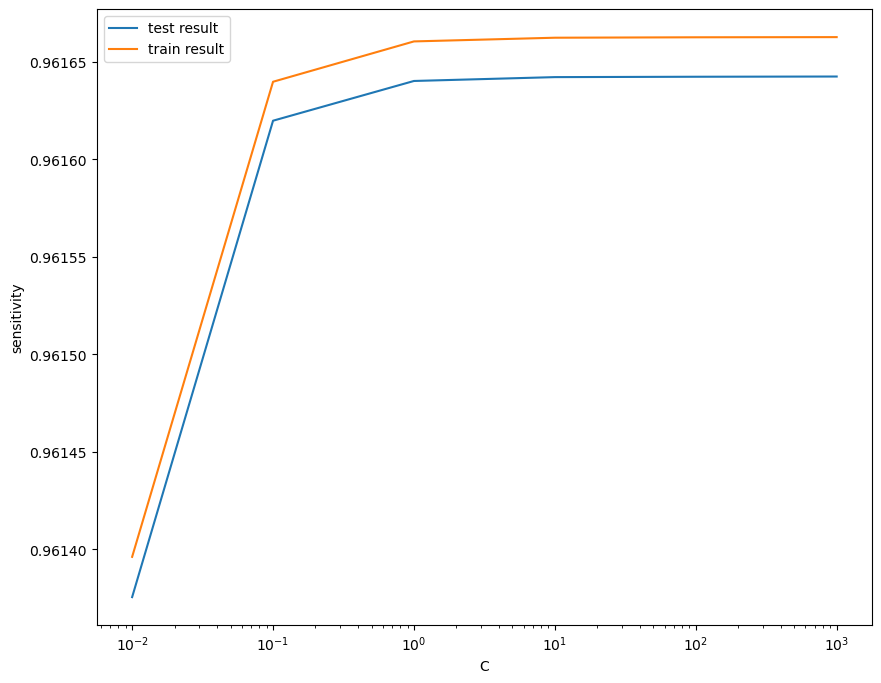

In [140]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

In [141]:
model_cv.best_params_

{'C': 1000}

In [142]:
{'C': 1000}
# Instantiating the model
logreg_adasyn_model = LogisticRegression(C=1000)

# Fitting the model 
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

In [143]:
# Evaluating on test data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)


F1 Score: 89.2%
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89    227451
           1       0.90      0.88      0.89    227434

    accuracy                           0.89    454885
   macro avg       0.89      0.89      0.89    454885
weighted avg       0.89      0.89      0.89    454885



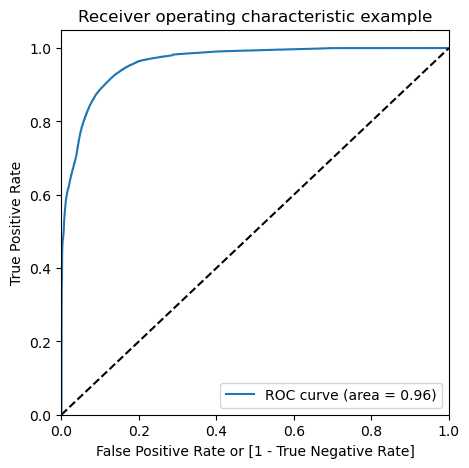

In [144]:

# Predicted probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating on test data

In [145]:
y_pred = logreg_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 3.23%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.90      0.95     56962



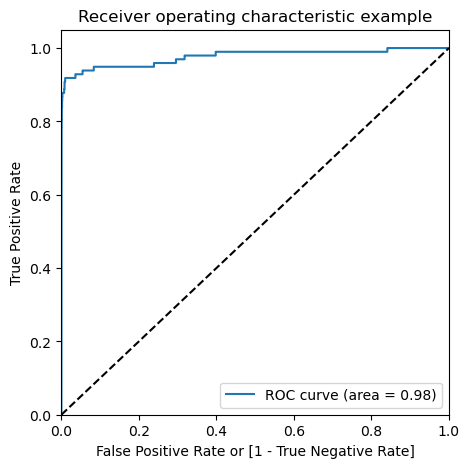

In [146]:
# Predicted probability
y_test_pred_prob = logreg_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_prob)

Model Summary<br>

Train set<br>
ROC score : 96%<br>
F1 score: 89.2%<br>
    
Test set<br>
ROC score : 98%<br>
F1 score: 3.23%<br>

## 2. Decision Tree on balanced data with ADASYN

In [148]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier for classification

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),  # Range of maximum depth values to be tried
    'min_samples_leaf': range(50, 150, 50),  # Range of minimum samples per leaf to be tried
    'min_samples_split': range(50, 150, 50),  # Range of minimum samples required to split an internal node to be tried
}

# Instantiate the grid search model with DecisionTreeClassifier
dtree = DecisionTreeClassifier()  # Creating a DecisionTreeClassifier instance

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dtree,  # Using DecisionTreeClassifier as estimator
                           param_grid=param_grid,  # Using the defined parameter grid
                           scoring='roc_auc',  # Scoring metric for evaluation
                           cv=5,  # Number of cross-validation folds
                           n_jobs=-1,  # Number of jobs to run in parallel (-1 for using all available cores)
                           verbose=1)  # Verbosity level: 0 (silent), 1 (progress bar), 2 (one line per fit)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn, y_train_adasyn)  # Fitting the grid search to the resampled training data


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [149]:
#optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9410038762299072
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [150]:
#Hyperparameter tuning

dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

#### Evaluating the model on train data

In [151]:
# Evaluating model on the test data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 97.79%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98    227451
           1       0.96      1.00      0.98    227434

    accuracy                           0.98    454885
   macro avg       0.98      0.98      0.98    454885
weighted avg       0.98      0.98      0.98    454885



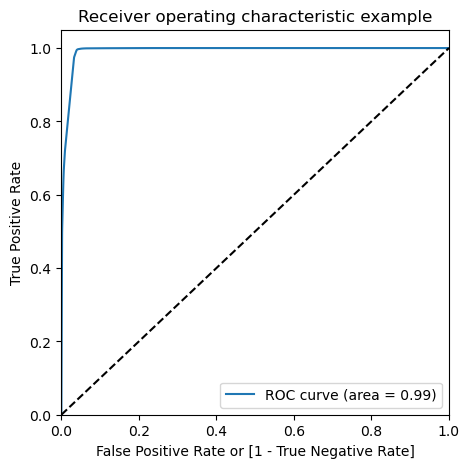

In [152]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [153]:
# Evaluating model on the test data
y_pred = dt_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 7.05%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.90      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.96      0.98     56962



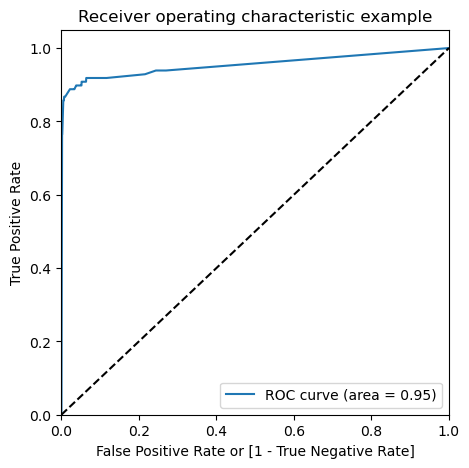

In [154]:

y_test_pred_prob = dt_adasyn_model.predict_proba(X_test)[:,1]

draw_roc(y_test, y_test_pred_prob)

Model Summary<br>

Train set<br>
ROC score : 99%<br>
F1 score: 97.79%<br>
    
Test set<br>
ROC score : 95%<br>
F1 score: 7.05%

## 3. XGBoost on balanced data with ADASYN

In [155]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, KFold  # Import GridSearchCV for hyperparameter tuning and KFold for cross-validation
from xgboost import XGBClassifier  # Import XGBoost classifier

# Define the number of folds for cross-validation
folds = 3

# Define the range of hyperparameters to be tuned
param_grid = {
    'learning_rate': [0.2, 0.6],  # Learning rates to be tried
    'subsample': [0.3, 0.6, 0.9]  # Subsample ratios to be tried
}

# Specify the model to be used (XGBoost Classifier) with initial hyperparameters
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)  # XGBoost classifier with specified max depth and number of estimators

# Set up GridSearchCV to perform hyperparameter tuning
model_cv = GridSearchCV(estimator=xgb_model,  # XGBoost classifier as estimator
                        param_grid=param_grid,  # Hyperparameter grid to search over
                        scoring='roc_auc',  # Scoring metric for evaluation
                        cv=KFold(n_splits=folds),  # KFold cross-validation with specified number of folds
                        verbose=1,  # Verbosity level: 0 (silent), 1 (progress bar), 2 (one line per fit)
                        return_train_score=True)  # Whether to return training scores

# Fit the model to the resampled training data
model_cv.fit(X_train_adasyn, y_train_adasyn)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [156]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,8.578916,0.096191,0.302078,0.014730,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999140,0.984898,NaN,NaN,NaN,1,0.998717,0.998928,0.999368,0.999004,0.000271
1,9.052554,0.330554,0.302086,0.057523,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999121,0.983021,NaN,NaN,NaN,1,0.998666,0.998943,0.999282,0.998964,0.000252
2,8.744774,0.247815,0.286462,0.038972,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999029,0.982190,NaN,NaN,NaN,1,0.998656,0.998994,0.999274,0.998975,0.000253
3,8.901017,0.382805,0.281249,0.033751,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999703,0.993757,NaN,NaN,NaN,1,0.999850,0.999903,0.999917,0.999890,0.000029
4,8.906239,0.313550,0.296868,0.051024,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999750,0.992217,NaN,NaN,NaN,1,0.999836,0.999899,0.999916,0.999884,0.000034
5,8.843749,0.532773,0.281253,0.044190,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999835,0.993490,NaN,NaN,NaN,1,0.999871,0.999914,0.999910,0.999898,0.000019


In [157]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  nan
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


#### hyperparameter tuniing

In [158]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

In [159]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

#### Evaluating the model on the train data

In [160]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
# Printing the scores
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227434

    accuracy                           1.00    454885
   macro avg       1.00      1.00      1.00    454885
weighted avg       1.00      1.00      1.00    454885



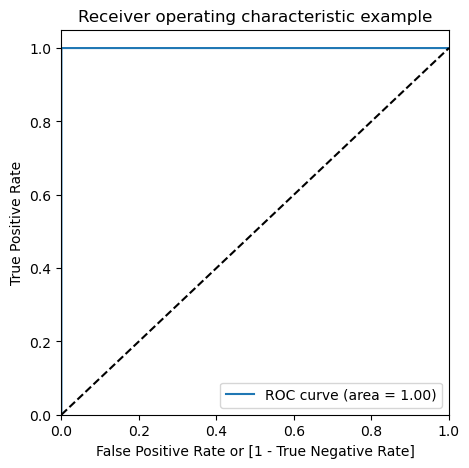

In [161]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Model Evaluation on Test Data

In [162]:
y_pred = xgb_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 82.3%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.88      0.82        98

    accuracy                           1.00     56962
   macro avg       0.89      0.94      0.91     56962
weighted avg       1.00      1.00      1.00     56962



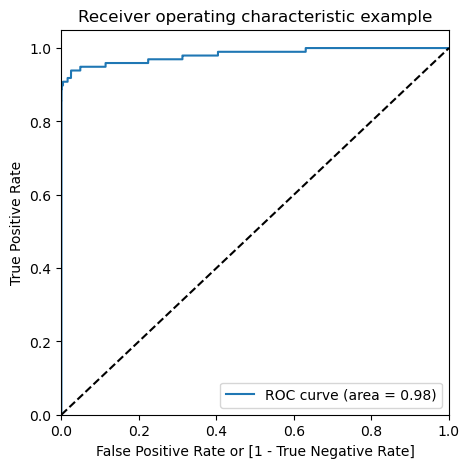

In [163]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model Summary<br>
<br>
Train set<br>
ROC score : 100.0%<br>
F1 score: 100.0%<br>
Test set
ROC score : 98%<br>
F1 score: 82.30%<br>

### Overall Best Results from the Oversampling Methods:

-  We have used Random Oversampling, SMOTE, and Adasyn technique to balance the dataset and then we performed logistic regression, 
random forest and XGBoost algorithms to build models on each sampling method.<br>

-  XGBoost model is performing well on the dataset which is balanced with AdaSyn technique. <br>
-  We got ROC score 100% on train data and 99% on the test data and F1 score 100% on train data and 81% in the test data.

### Imp features of the Best Model

Top var = 14
2nd Top var = 4
3rd Top var = 8


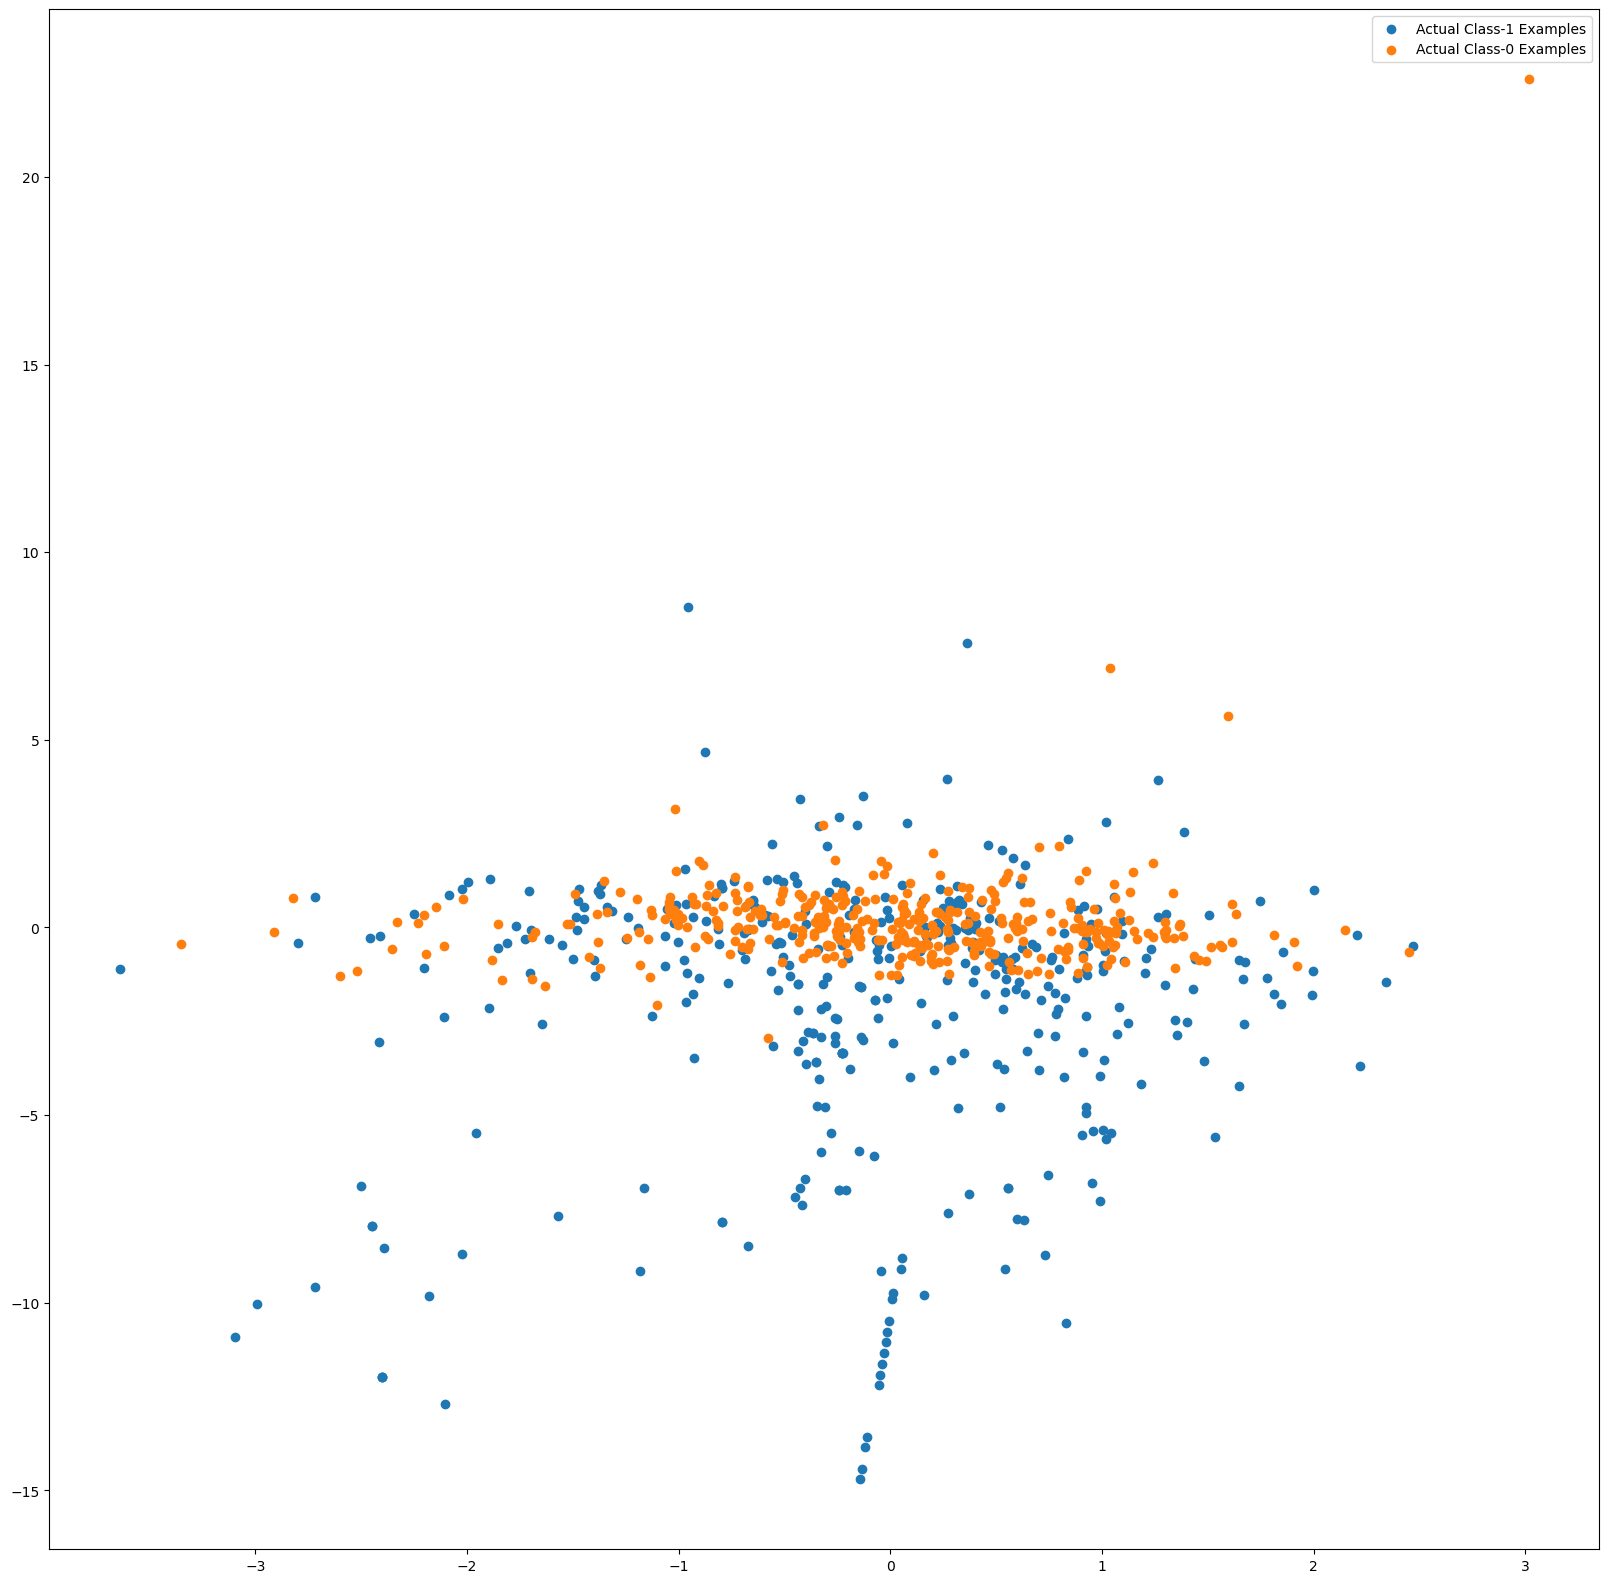

In [165]:
# Initialize an empty list to store feature importances
var_imp = []

# Iterate over each feature importance value and append it to the list
for i in xgb_adasyn_model.feature_importances_:
    var_imp.append(i)

# Find the index of the top 3 most important features
top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1]) + 1
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2]) + 1
third_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-3]) + 1

# Print the indices of the top 3 most important features
print('Top var =', top_var_index)
print('2nd Top var =', second_top_var_index)
print('3rd Top var =', third_top_var_index)

# Extract samples from the original training data for class 1 and class 0
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

# Shuffle the samples of class 0 to avoid any potential bias
np.random.shuffle(X_train_0)

# Plotting the samples of class 1 and class 0 using the top 2 most important features
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()


In [166]:
# Calculate and print the AUC score for the training set
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))

# Compute the ROC curve for the training set
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba)

# Find the threshold that maximizes the difference between true positive rate (TPR) and false positive rate (FPR)
threshold = thresholds[np.argmax(tpr - fpr)]

# Print the threshold
print(threshold)


Train auc = 1.0
0.9223263


### Summary

-  Selecting XGBoost model for CCard Fraud Detection, and our objective is to acheive higher recall rate.
-  Recall Rate is crucial for identifying the fraudulent activities.
-  Banking Ccard frauds causes heavy loss of credibility and trust for the bank and the customers. Recall rate is one of
best to identify such fraudulent activites.